# Step 1: Reading and understanding the data

In [1]:
##Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm, probplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")



Display settings

In [2]:

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
#loading data
df = pd.read_csv("train.csv")

In [4]:
df.head(25)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
20         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
21         Bnk    AllPub    Inside       Gtl       IDOTRR       Norm   
22         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
23         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
24         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Stor

In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Inference 
-  By seeing the count metric, it is understood that some columns are completely empty. 
-  In the next step, we will look into the missing values in each column and, accordingly, make a decision whether to drop the column or impute the missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step 2: Data cleaning

## 2.1 checking for duplicates in dataframe


In [8]:
## copying the data frame to check for duplicates
df_duplicate = df.copy()
df_duplicate.shape

(1460, 81)

In [9]:
df_duplicate.drop_duplicates(inplace=True)
df_duplicate.shape

(1460, 81)

Inference- no duplicate in data frame as the shape of duplicate data frame is same after dropping duplicates.

## 2.2 Missing value Treatment

In [10]:
#checking % of missing values
Total_missing = df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(81)

Total_missing_values  Percent_missing_values
PoolQC                         1453               99.520548
MiscFeature                    1406               96.301370
Alley                          1369               93.767123
Fence                          1179               80.753425
MasVnrType                      872               59.726027
FireplaceQu                     690               47.260274
LotFrontage                     259               17.739726
GarageYrBlt                      81                5.547945
GarageCond                       81                5.547945
GarageType                       81                5.547945
GarageFinish                     81                5.547945
GarageQual                       81                5.547945
BsmtFinType2                     38                2.602740
BsmtExposure                     38                2.602740
BsmtQual                         37                2.534247
BsmtCond                         37                2.534247
BsmtFinType1                     37                2.534247
MasVnrArea                        8                0.547945
Electrical                        1                0.068493
Id                                0                0.000000
Functional                        0                0.000000
Fireplaces                        0                0.000000
KitchenQual                       0                0.000000
KitchenAbvGr                      0                0.000000
BedroomAbvGr                      0                0.000000
HalfBath                          0                0.000000
FullBath                          0                0.000000
BsmtHalfBath                      0                0.000000
TotRmsAbvGrd                      0                0.000000
GarageCars                        0                0.000000
GrLivArea                         0                0.000000
GarageArea                        0                0.000000
PavedDrive                        0                0.000000
WoodDeckSF                        0                0.000000
OpenPorchSF                       0                0.000000
EnclosedPorch                     0                0.000000
3SsnPorch                         0                0.000000
ScreenPorch                       0                0.000000
PoolArea                          0                0.000000
MiscVal                           0                0.000000
MoSold                            0                0.000000
YrSold                            0                0.000000
SaleType                          0                0.000000
SaleCondition                     0                0.000000
BsmtFullBath                      0                0.000000
HeatingQC                         0                0.000000
LowQualFinSF                      0                0.000000
LandSlope                         0                0.000000
OverallQual                       0                0.000000
HouseStyle                        0                0.000000
BldgType                          0                0.000000
Condition2                        0                0.000000
Condition1                        0                0.000000
Neighborhood                      0                0.000000
LotConfig                         0                0.000000
YearBuilt                         0                0.000000
Utilities                         0                0.000000
LandContour                       0                0.000000
LotShape                          0                0.000000
Street                            0                0.000000
LotArea                           0                0.000000
MSZoning                          0                0.000000
OverallCond                       0                0.000000
YearRemodAdd                      0                0.000000
2ndFlrSF                          0                0.000000
BsmtFinSF2                        0                0.00

In [11]:
##Inspecting null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns and their null value %
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Alley           93.77
MasVnrType      59.73
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

Replacing null value none

In [12]:
##Considering the aspect of 'meaningful missing'. Replace nulls with 'None' where null implies absence of feature (from data dictionary)

cat_null_obj_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','Electrical']
for column in cat_null_obj_cols:
    df[column]= df[column].fillna('None')

In [13]:
##Inspecting null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

## Step 3 - Handling imbalance data set wrt to categorical column 

Removing categorical column with 80% of single value

In [14]:



df = df

# Function to identify and remove skewed categorical columns
def remove_categoricals(data, threshold=0.8):
    cat_cols = []
    for col in data.select_dtypes(include='object'):
        value_counts = data[col].value_counts(normalize=True)
        if value_counts.max() > threshold:
            cat_cols.append(col)
    data = data.drop(columns=cat_cols)
    return data, cat_cols

# Remove skewed categorical columns
df, removed_cols = remove_categoricals(df, threshold=0.8)

# Display removed columns and updated DataFrame
print("Categorical columns removed:", removed_cols)
print("\nUpdated DataFrame:")
print(df.head())

Categorical columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Updated DataFrame:
   Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      CollgCr     2Story            7            5       2003          2003   
1      Veenker     1Story            6            8 

In [15]:
df.shape

(1460, 57)

In [16]:
##Recheck null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [17]:
cat_col = list(df.select_dtypes(['object']).columns)

In [18]:
print (cat_col)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']


## 3.1 Categorical columns EDA

In [19]:
print(cat_col)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']


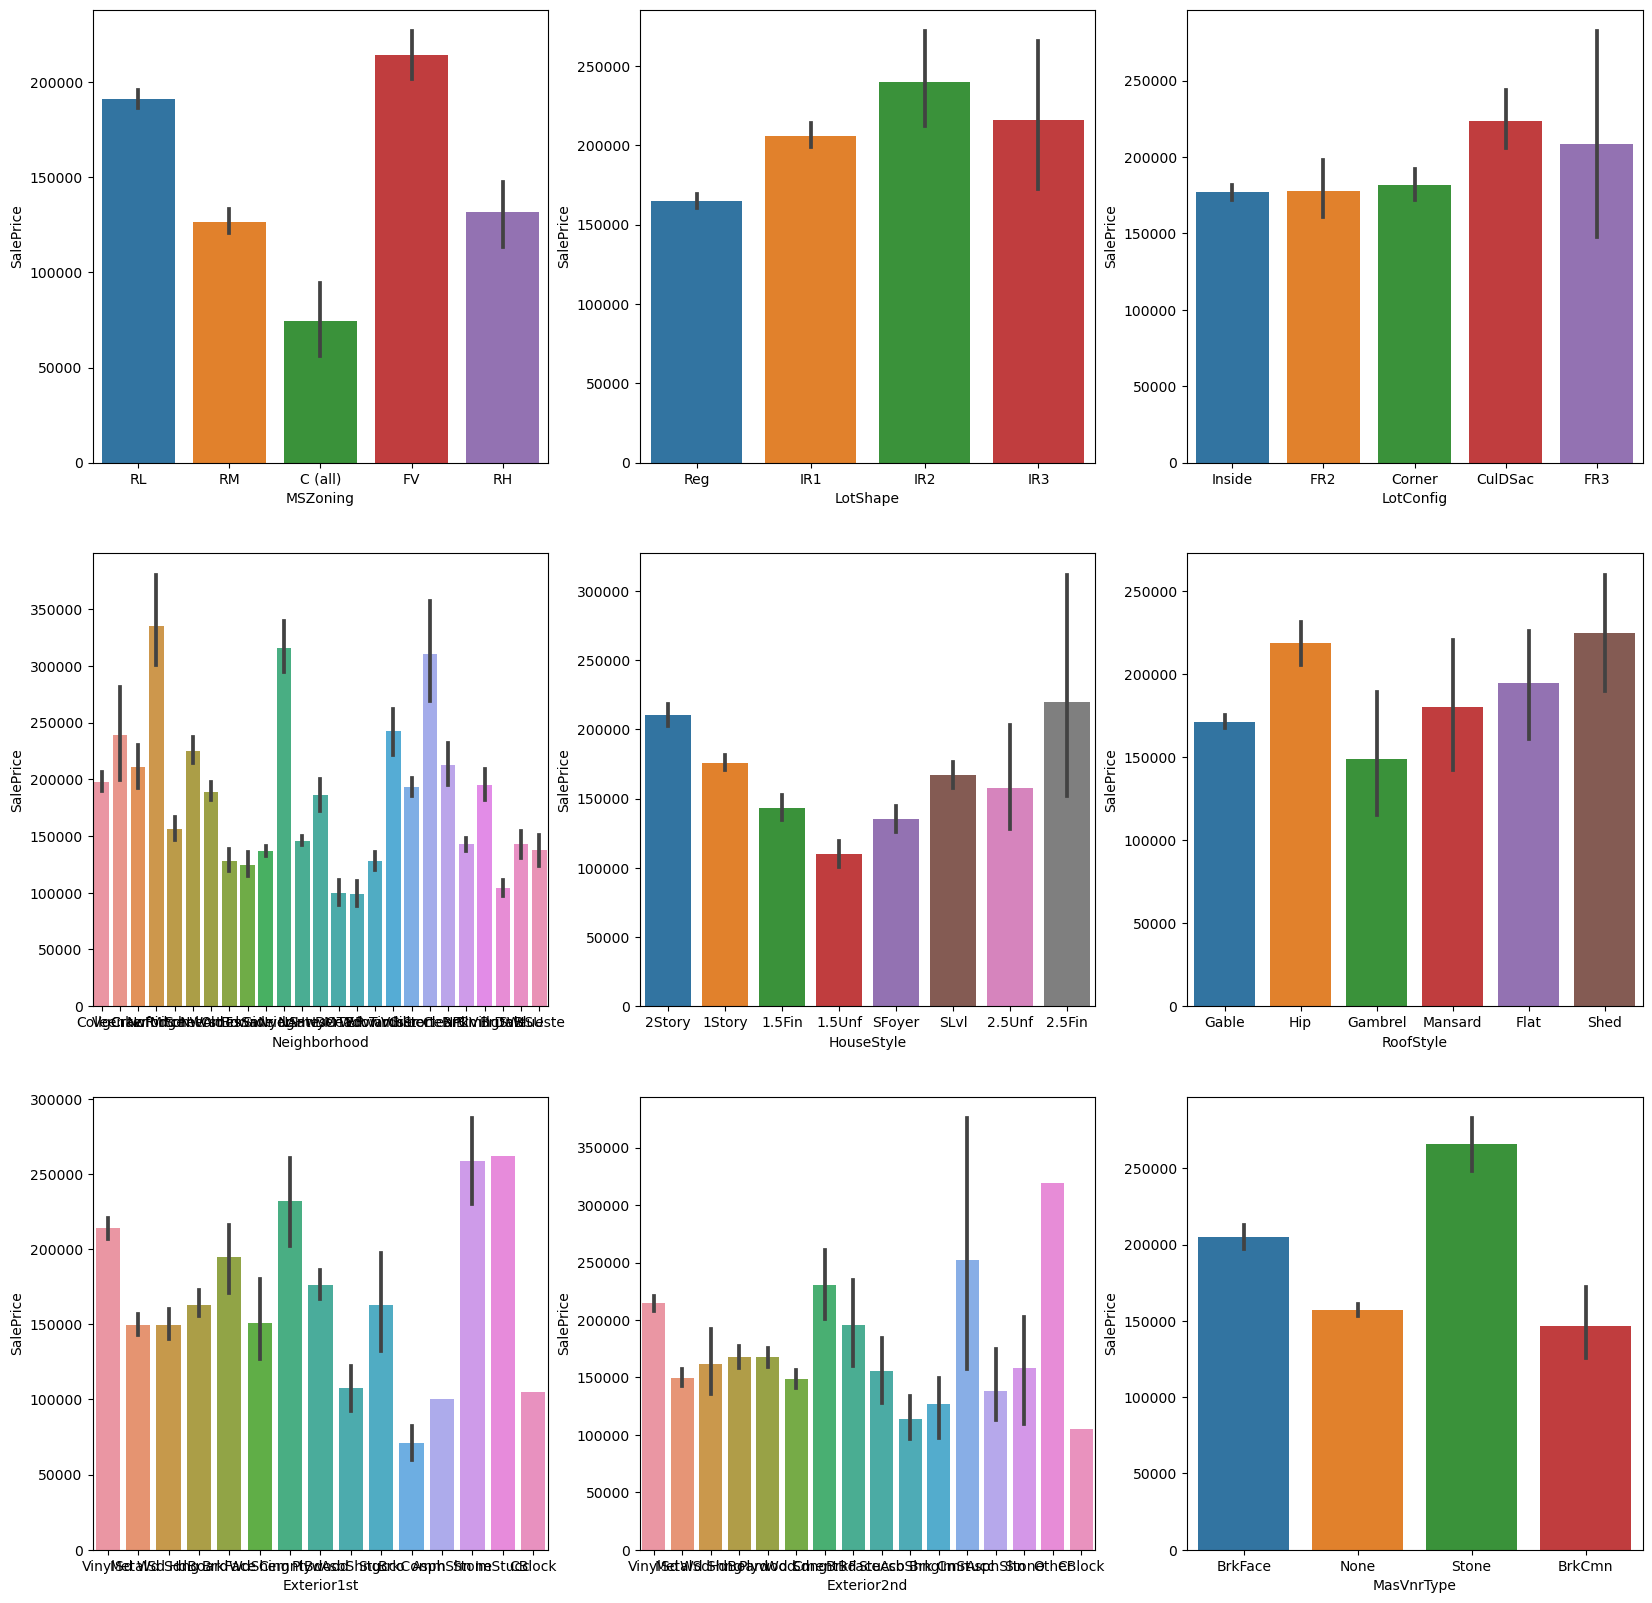

In [20]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.barplot(x='MSZoning', y="SalePrice", data=df)
plt.subplot(3,3,2)
sns.barplot(x='LotShape', y="SalePrice", data=df)
plt.subplot(3,3,3)
sns.barplot(x='LotConfig', y="SalePrice", data=df)
plt.subplot(3,3,4)
sns.barplot(x='Neighborhood', y="SalePrice", data=df)
plt.subplot(3,3,5)
sns.barplot(x='HouseStyle', y="SalePrice", data=df)
plt.subplot(3,3,6)
sns.barplot(x='RoofStyle', y="SalePrice", data=df)
plt.subplot(3,3,7)
sns.barplot(x='Exterior1st', y="SalePrice", data=df)
plt.subplot(3,3,8)
sns.barplot(x='Exterior2nd', y="SalePrice", data=df)
plt.subplot(3,3,9)
sns.barplot(x='MasVnrType', y="SalePrice", data=df)
plt.show()

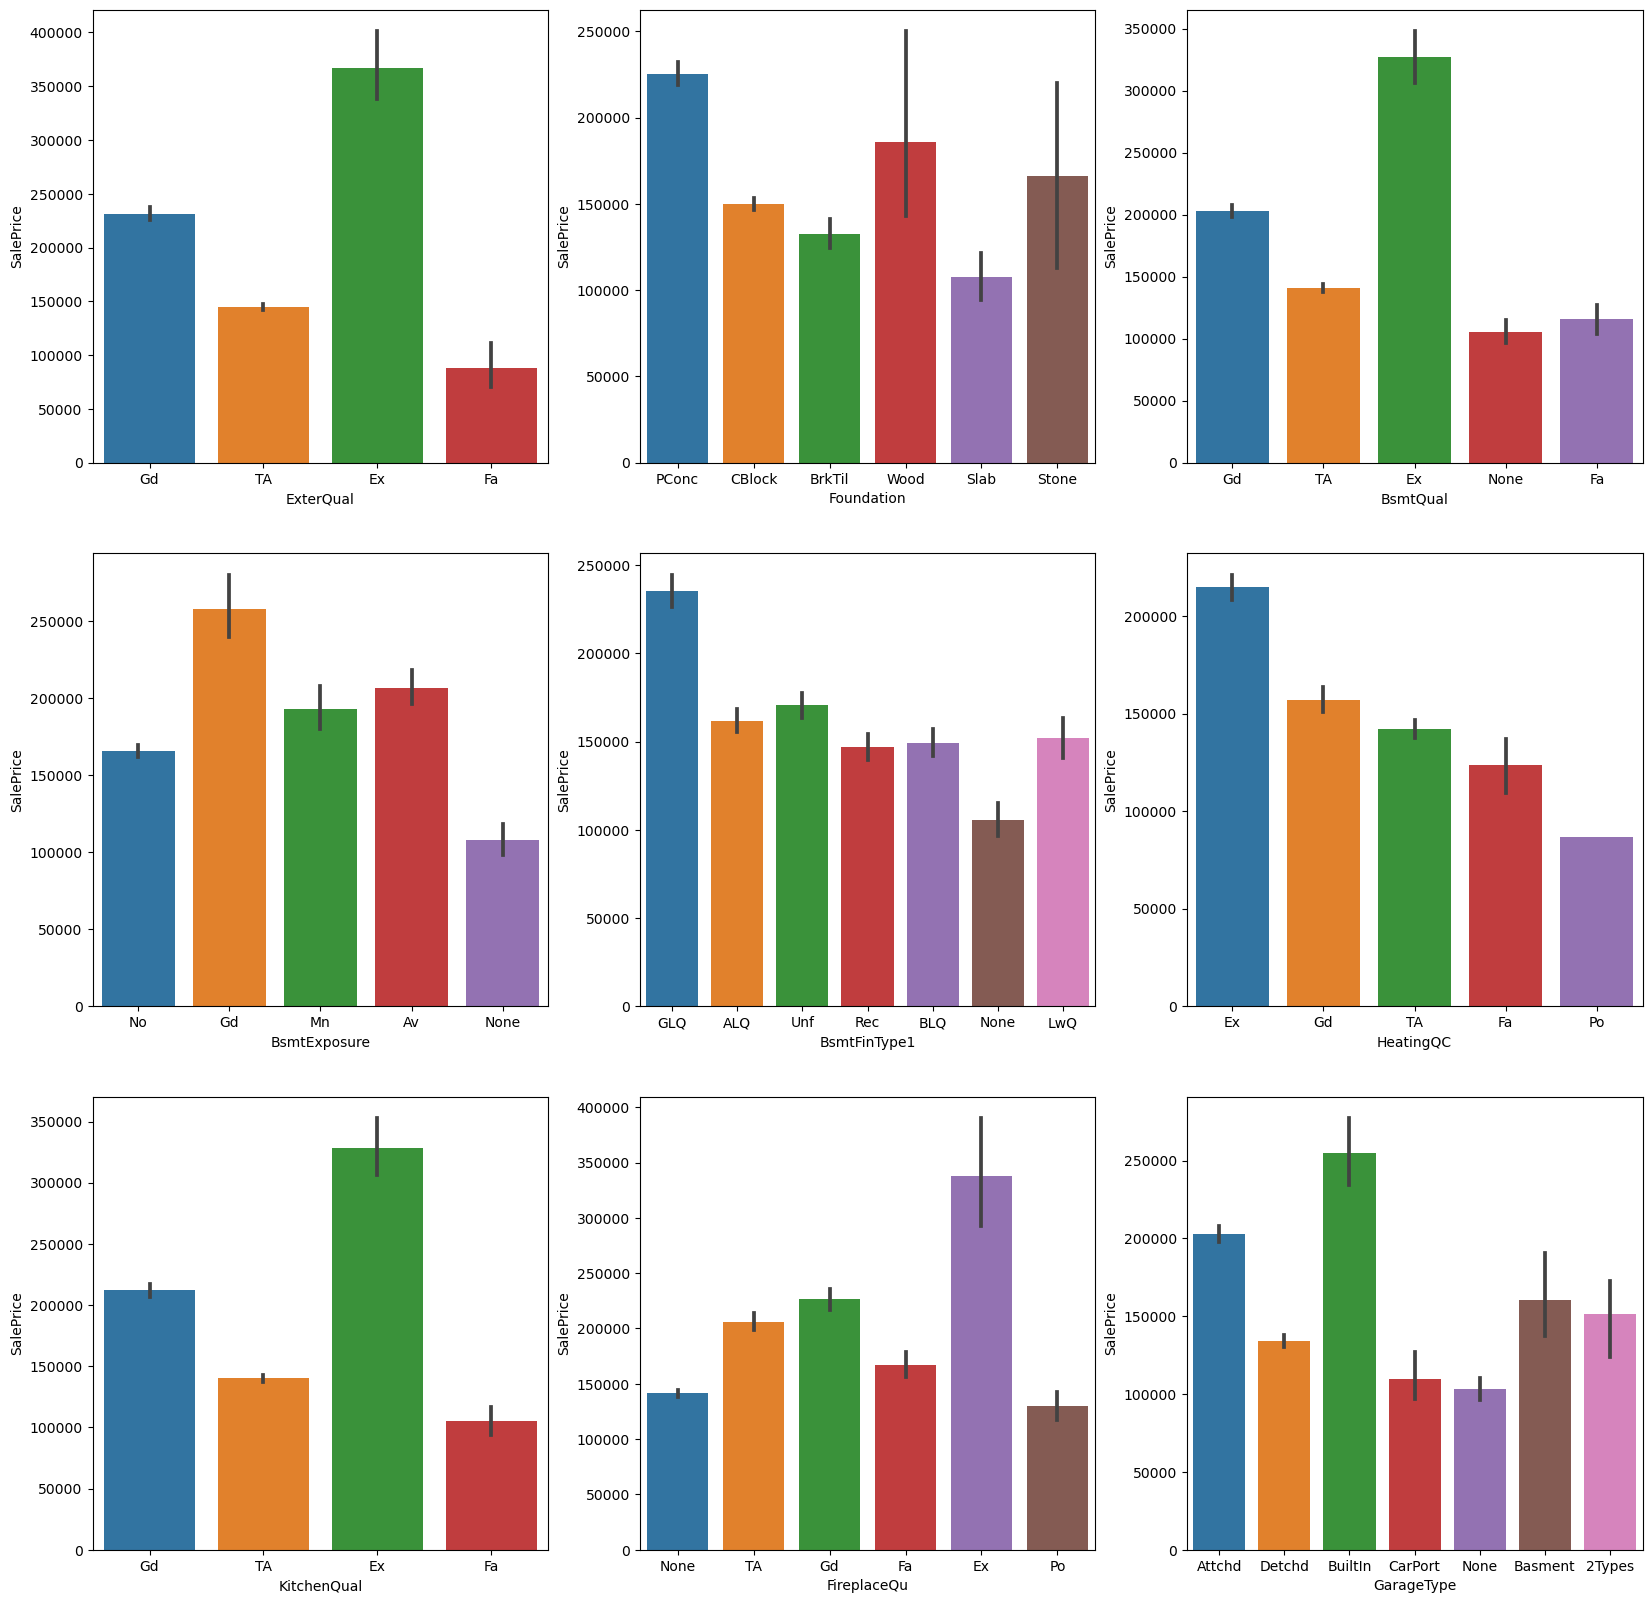

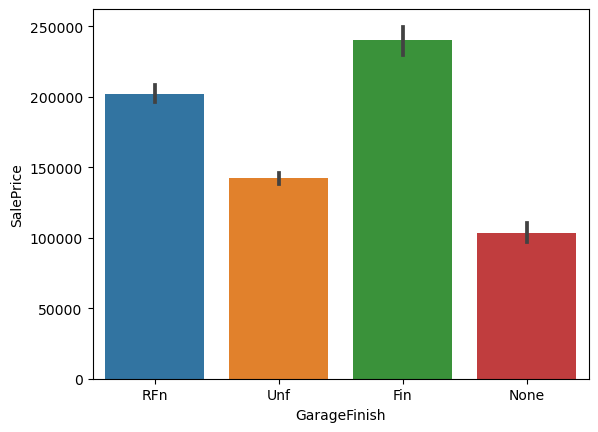

In [21]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.barplot(x='ExterQual', y="SalePrice", data=df)
plt.subplot(3,3,2)
sns.barplot(x='Foundation', y="SalePrice", data=df)
plt.subplot(3,3,3)
sns.barplot(x='BsmtQual', y="SalePrice", data=df)
plt.subplot(3,3,4)
sns.barplot(x='BsmtExposure', y="SalePrice", data=df)
plt.subplot(3,3,5)
sns.barplot(x='BsmtFinType1', y="SalePrice", data=df)
plt.subplot(3,3,6)
sns.barplot(x='HeatingQC', y="SalePrice", data=df)
plt.subplot(3,3,7)
sns.barplot(x='KitchenQual', y="SalePrice", data=df)
plt.subplot(3,3,8)
sns.barplot(x='FireplaceQu', y="SalePrice", data=df)
plt.subplot(3,3,9)
sns.barplot(x='GarageType', y="SalePrice", data=df)
plt.show()
plt.subplot()
sns.barplot(x='GarageFinish', y="SalePrice", data=df)
plt.show()

Inference-

MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price.

The lotshape 'IR2' has high saleprice.

LotConfig 'CulDsac' has high sale price.

HouseStyle '2story' and '2.5Fin' has high sale price.

Roofstyle 'Hip' and 'Shed' has high sale price.

MasVnrType 'stone' has high price.

The house with Exterior Quality of type Execellent has the highest SalePrice.

The house with concerete  has the highest SalePrice.

The house with Basement Quality of type Execellent has the highest SalePrice.

The house with Basement exposure of type Good has the highest SalePrice.

The house with excellent heating quality has the highest SalePrice.

The house with Kitchen Quality of type Execellent has the highest SalePrice.

The house with Garage Quality of type Execellent has the highest SalePrice.

For fireplace quality type excellent has highest sale price.

The house with Garage Type of type BuiltIn has the highest SalePrice.

For Garage finish type 'Fin' highest sale price.


## Step 4:Handling imbalance data set wrt to numerical column 


In [22]:
##Inspecting null values in the numeric columns.

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [23]:
print("LotFrontage Stats:\n",df.LotFrontage.describe())

LotFrontage Stats:
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [24]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())

In [25]:
print("MasVnrArea Stats:\n",df.LotFrontage.describe())

MasVnrArea Stats:
 count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [26]:
updated_MasVnrArea = df.loc[df['MasVnrArea'].ne(0), 'MasVnrArea']
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())

In [27]:
print("GarageYrBlt stats:\n",df.LotFrontage.describe())

GarageYrBlt stats:
 count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [28]:
#Filling the null values with 0 for 'GarageYrBlt' for now as we would be handling this column further below

df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int) 

In [29]:
num_obj_null_col = df.select_dtypes(include=['int','float'])
missing_num_obj_null_prcnt = round(100*num_obj_null_col.isnull().sum()/len(num_obj_null_col.index),2)
missing_num_obj_null_prcnt = missing_num_obj_null_prcnt[missing_num_obj_null_prcnt!=0]
missing_num_obj_null_prcnt

Series([], dtype: float64)

## 4.1 Creating new feature

In [30]:
## creating  new column "houseage" from "YearRemodAdd" and "YrSold"
df['HouseAge'] = df.YrSold - df.YearRemodAdd
df['HouseAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: HouseAge, dtype: int64

In [31]:
df=df.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [32]:
df.shape

(1460, 54)

Removing numerical column with 80% of single value

In [33]:

df = df

# Function to identify and remove skewed categorical columns
def remove_numerical(data, threshold=0.8):
    num_cols = []
    for col in data.select_dtypes(include='object'):
        value_counts = data[col].value_counts(normalize=True)
        if value_counts.max() > threshold:
            num_cols.append(col)
    data = data.drop(columns=num_cols)
    return data, num_cols

# Remove skewed categorical columns
df, removed_cols = remove_numerical(df, threshold=0.8)

# Display removed columns and updated DataFrame
print("numerical columns removed:", removed_cols)
print("\nUpdated DataFrame:")
print(df.head())

numerical columns removed: []

Updated DataFrame:
   Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0      CollgCr     2Story            7            5     Gable     VinylSd   
1      Veenker     1Story            6            8     Gable     MetalSd   
2      CollgCr     2Story            7            5     Gable     VinylSd   
3      Crawfor     2Story            7            5     Gable     Wd Sdng   
4      NoRidge     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation Bs

In [34]:
##Reheck for percentage of null values in the entire dataframe
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = missing_val_cols_prcnt[missing_val_cols_prcnt!=0]
missing

Series([], dtype: float64)

In [35]:
df.shape

(1460, 54)

## 4.2 Numerical Column EDA

In [36]:
num_col = list(df.select_dtypes(['int','float']).columns)
num_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'HouseAge']

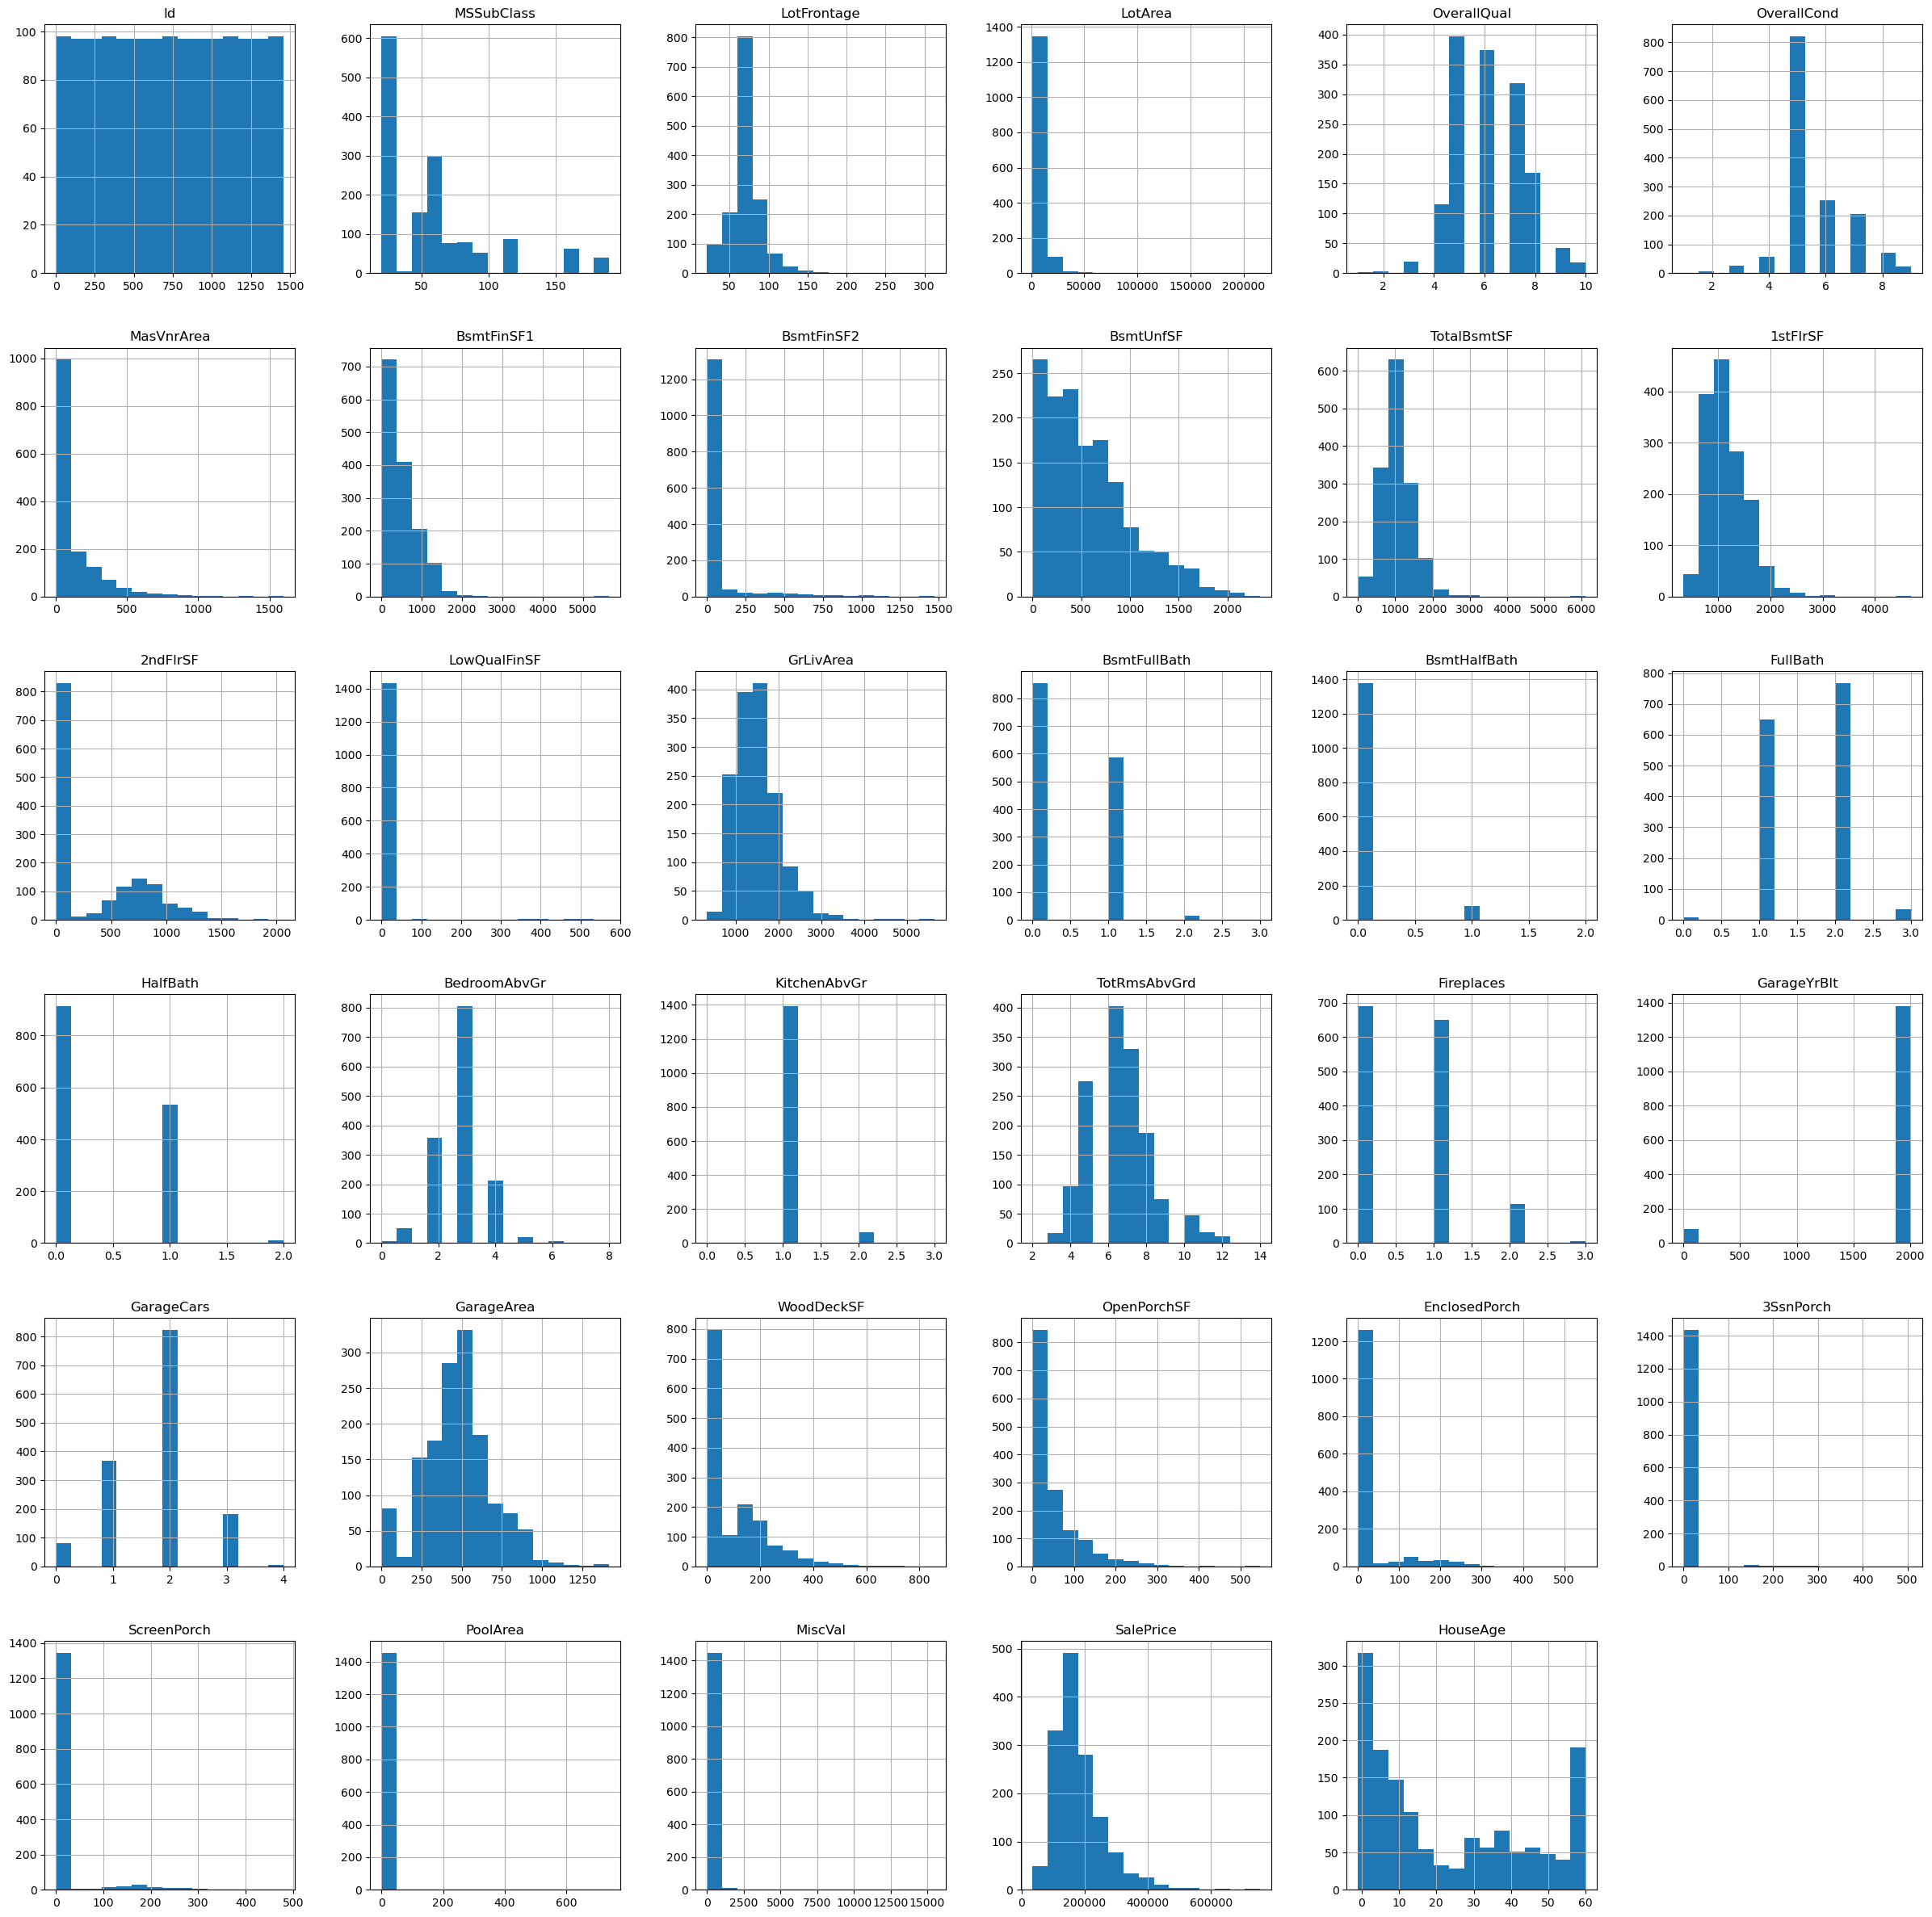

In [37]:
df[num_col].hist(bins=15, figsize=(30, 30))
plt.show()

Inference-

we observe that certain variables exhibit significant skewness, and there is a potential for these variables to be correlated with each other. Interpreting these relationships poses challenges when relying solely on univariate analysis.

In [38]:
df = df.drop(['Id'], axis=1)

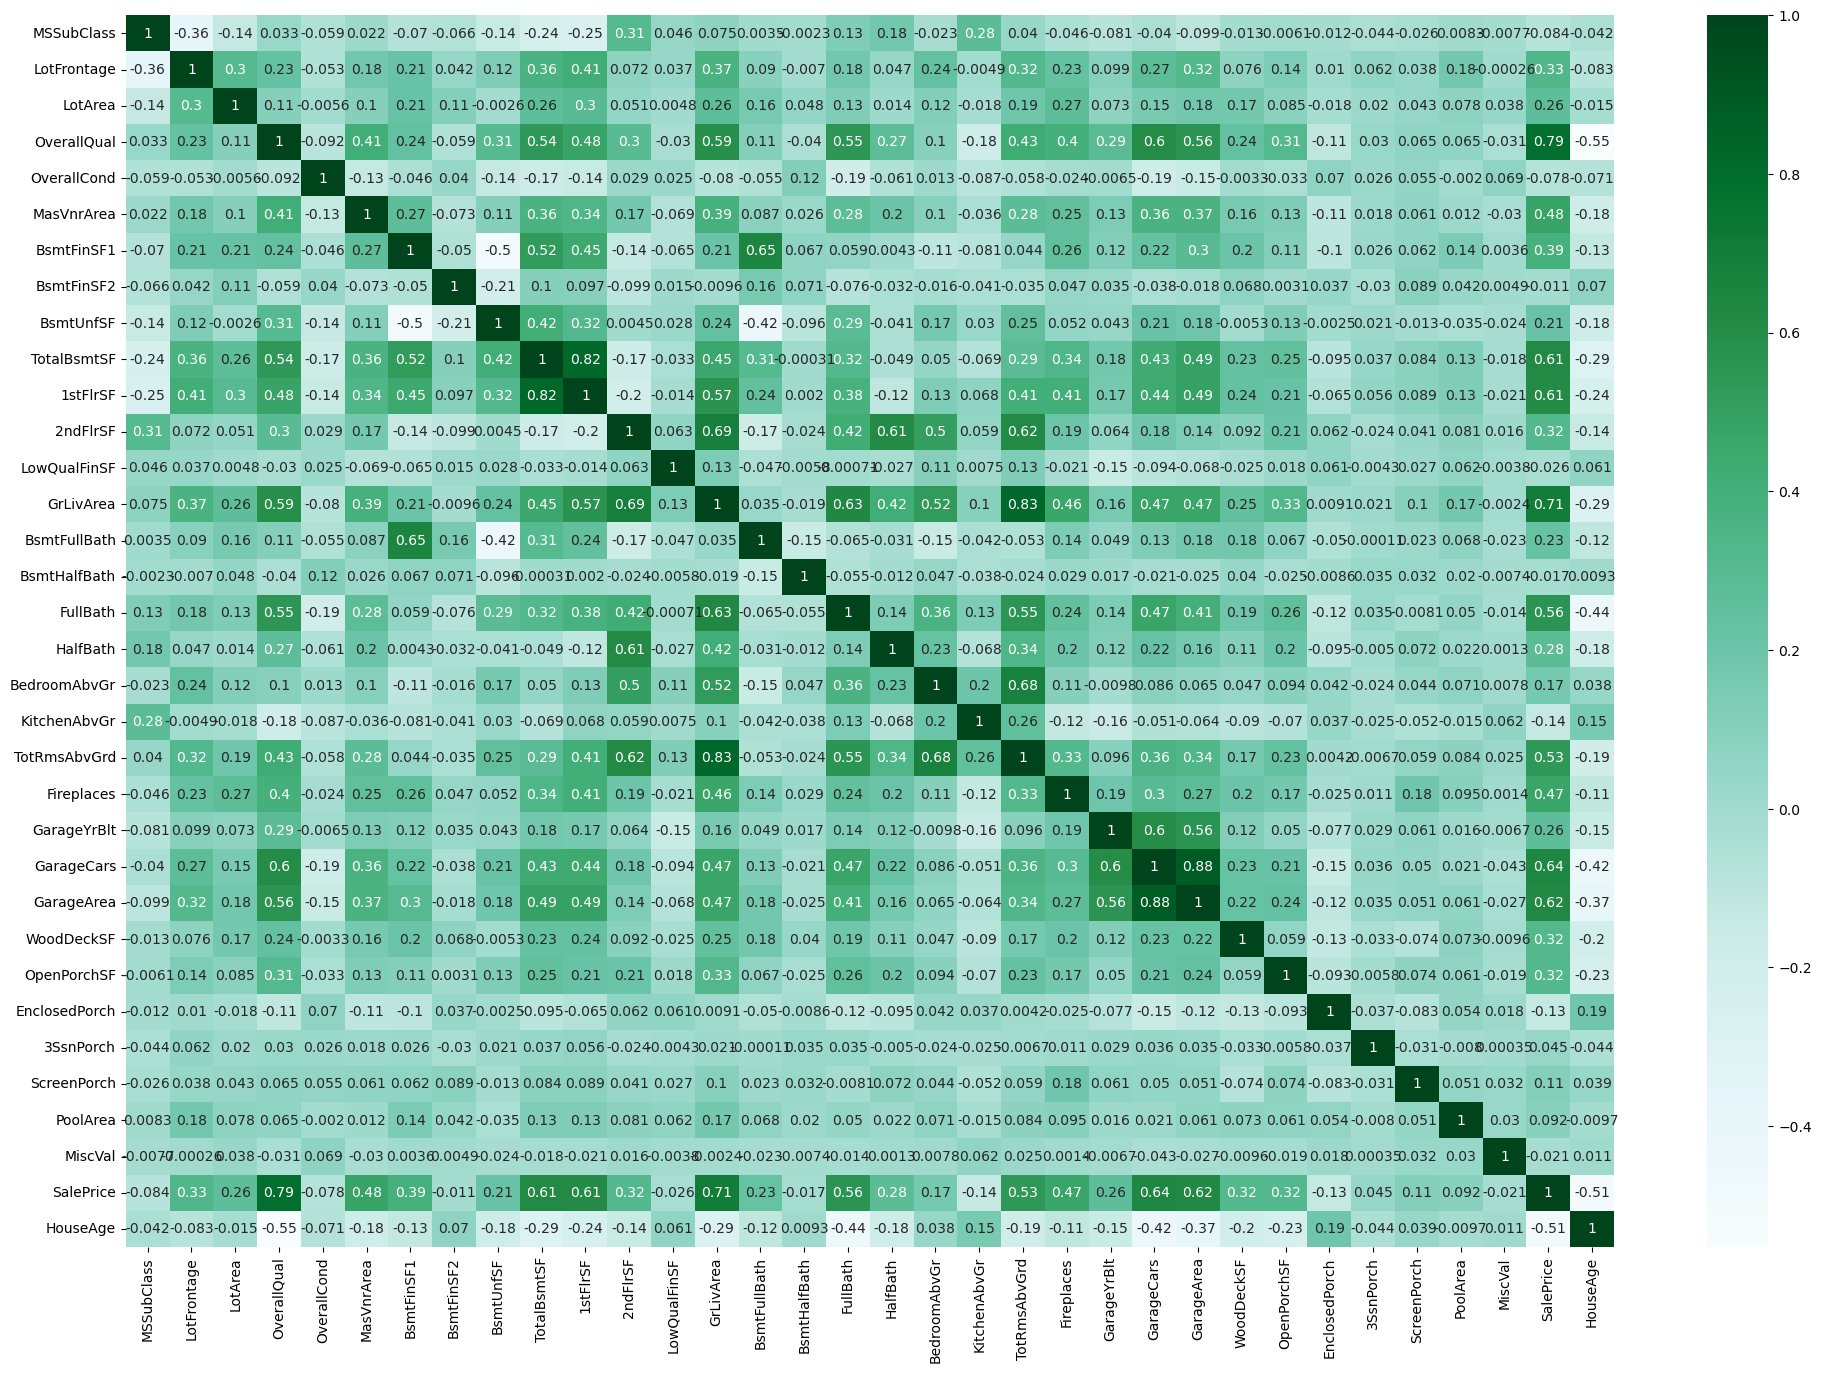

In [39]:
num_col = list(df.select_dtypes(['int','float']).columns)
num_col
plt.figure(figsize=(24,16))
sns.heatmap(df[num_col].corr(), cmap='BuGn', annot = True)
plt.show()

Inference-

1- Target variable "SalePrice" is positively correlated to "ExterQual","BsmtQual","TotalBsmtSF","1stFlrSF","GrLivArea",
"FullBath","kitchenQual","TotRmsAbvGrd","GarageFinish","GarageCars","GarageArea"

2-Target variable "SalePrice" is negatively correlated to "HouseAge"

3-"ExterQual" is highly corelated to "BsmtQual","HeatingQC","KitchenQual","GarageFinish","GarageCars","GarageArea","SalePrice"

4-"BsmtQual" is highly corelated to "ExterQual",KitchenQual","GarageFinish","GarageCars","GarageArea","SalePrice"

5-"BsmtFineType1" is highly correlated to "BsmntFinSF1","BsmntFullBath"

6- "BsmntFinSF1" is highly correlated to "BsmtFineType1","TotalBsmtSF","BsmntFullBath"

7-"BsmtFineType2" is highly correlated to "BsmntFinSF2"

8-"TotalBsmtSF"  is highly correlated to "BsmntFinSF1","1stFlrSF","SalePrice"

9-"GrLivArea"  is highly correlated to "1stFLrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd","SalePrice"

10-"GarageCars" is highly correlated to "GarageArea"

During model building some of the features showing multicolinarity will be dropped.

## Handling Outliers

In [40]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
10%      20.000000    49.000000    5000.000000     5.000000     5.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
98%     188.200000   120.820000   25251.620000     9.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
100%    190.000000   313.000000  215245.000000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    104.229452   443.639726    46.549315   567.240411  1057.429452   
std     180.717988   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
10%       0.000000     0.000000     0.000000    74.900000   636.900000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     168.000000   712.250000     0.000000   808.000000  1298.250000   
95%     456.000000  1274.000000   396.200000  1468.000000  1753.000000   
98%     650.820000  1442.640000   658.120000  1678.200000  2001.640000   
99%     791.280000  1572.410000   830.380000  1797.050000  2155.050000   
100%   1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
10%     756.900000     0.000000      0.000000   912.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
95%    1831.250000  1141.050000      0.000000  2466.100000      1.000000   
98%    2072.280000  1318.560000      0.000000  2782.380000      1.000000   
99%    2219.460000  1418.920000    360.000000  3123.480000      2.000000   
100%   4692.000000  2065.000000    572.000000  5642.000000      3.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
10%        0.000000     1.000000     0.000000      2.000000      1.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
95%        1.000000     2.000000     1.000000      4.000000      1.000000   
98%        1.000000     3.000000     1.000000      4.000000      2.0000

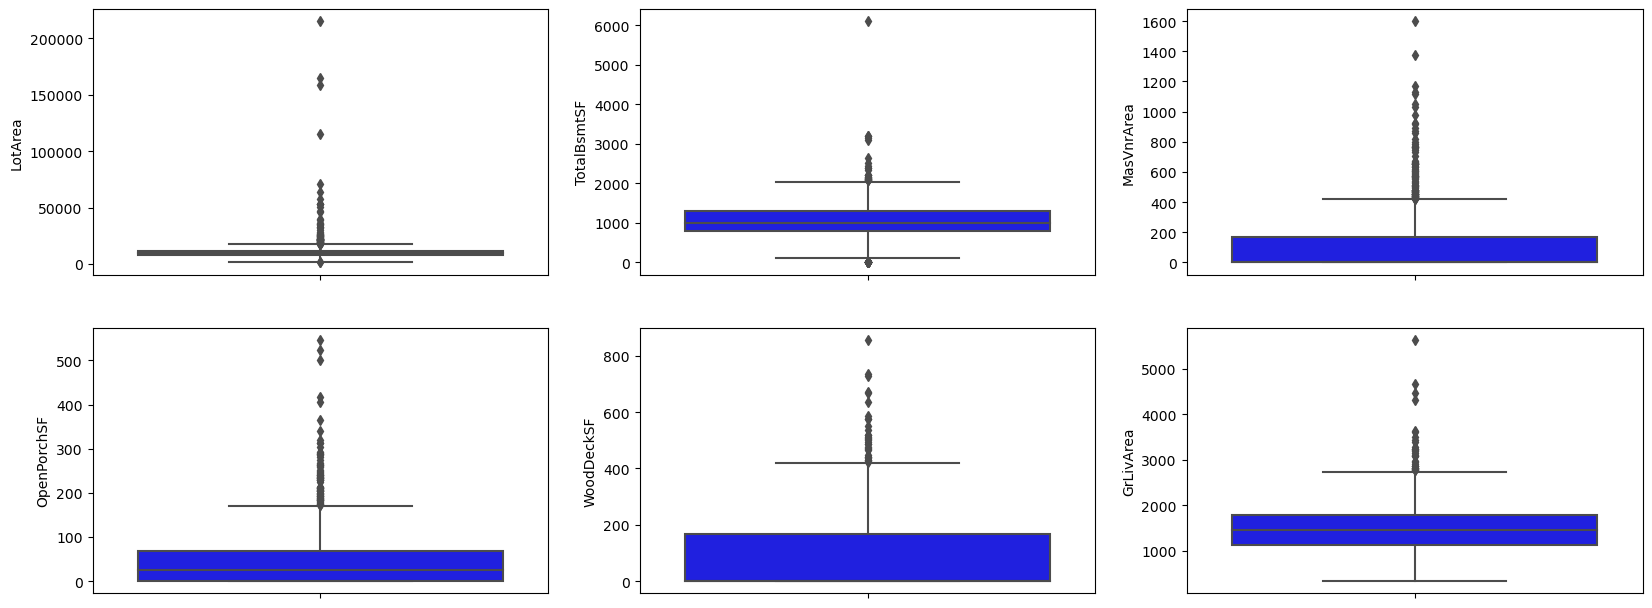

In [41]:
# Check the outliers in all the numeric columns (boxplot)

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color='b', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', color='b', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', color='b', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF', color='b', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', color='b', data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', color='b', data = df)
plt.show()

In [42]:
##Removing the Outliers

q_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < q_LotArea]

q_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < q_TotalBsmtSF]


q_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < q_WoodDeckSF]

q_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < q_OpenPorchSF]

# Step 5 - Data Processing

## 5.1 Target Variable - "SalePrice"

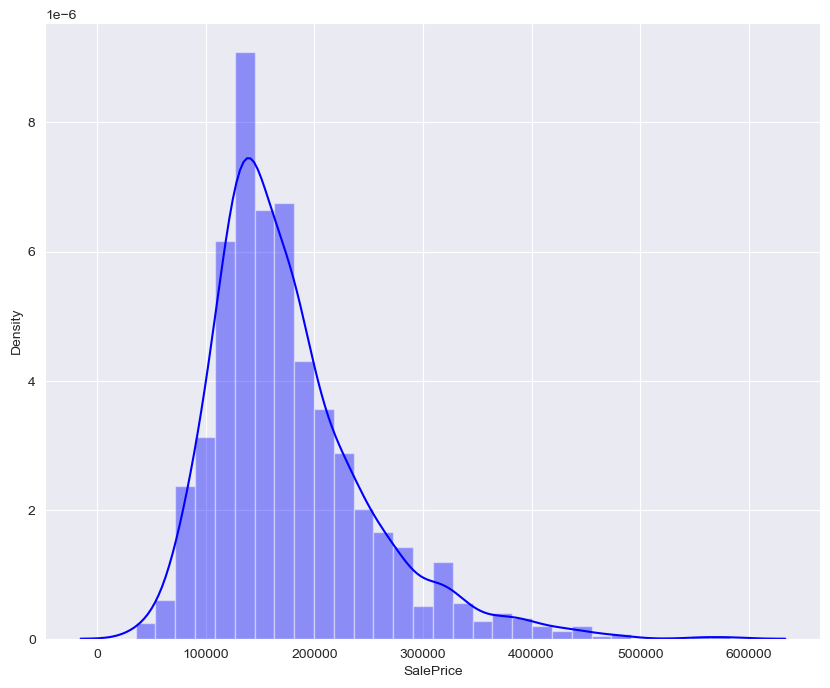

In [43]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'],bins=30, color='blue');

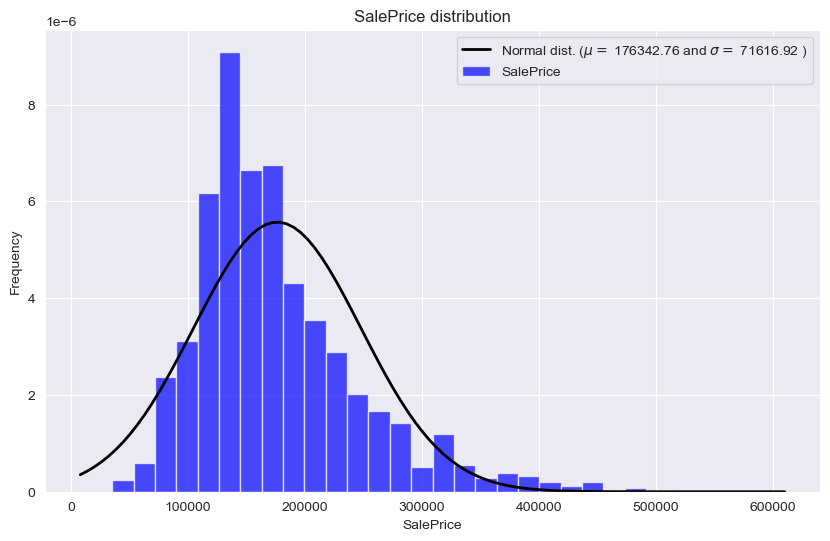

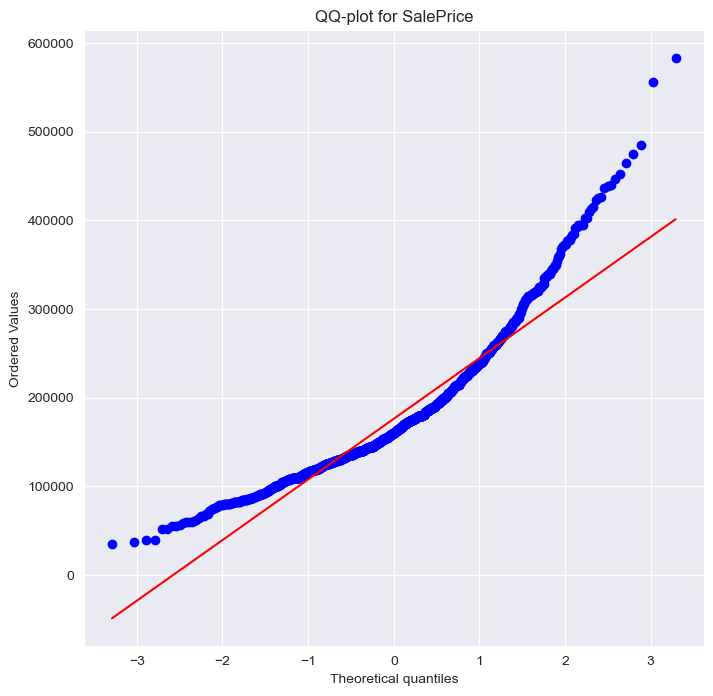

In [44]:
# Distribution plot
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, density=True, alpha=0.7, color='blue')

# Fitted normal distribution curve
(mu, sigma) = norm.fit(df['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Legend and labels
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma), 'SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()
from scipy import stats
# QQ-plot
plt.figure(figsize=(8, 8))
stats.probplot(df['SalePrice'], plot=plt)
plt.title('QQ-plot for SalePrice')
plt.show()

Inference-

The target variable, 'SalePrice', exhibits right skewness. To address this skewness and achieve a distribution closer to normal, we plan to apply the log transformation method.

In [45]:
 ## Log Transformation of Target Variable
df["SalePrice"] = np.log(df["SalePrice"])

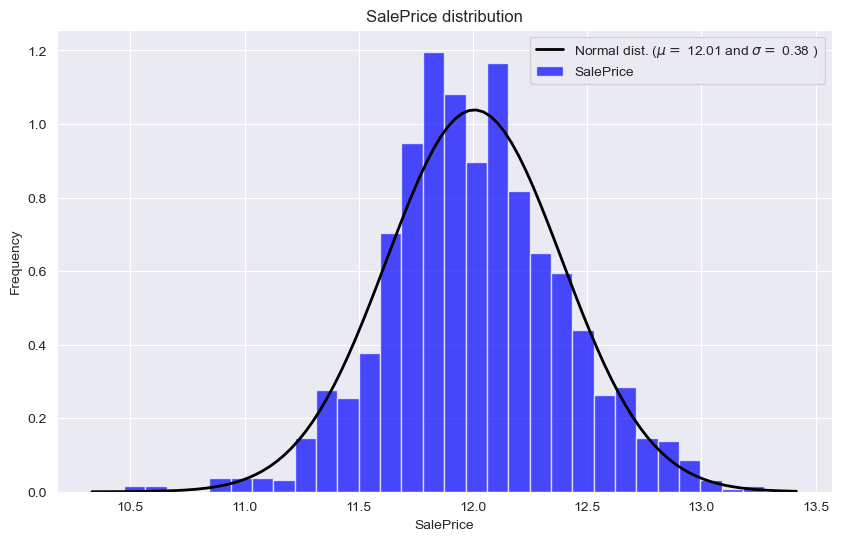

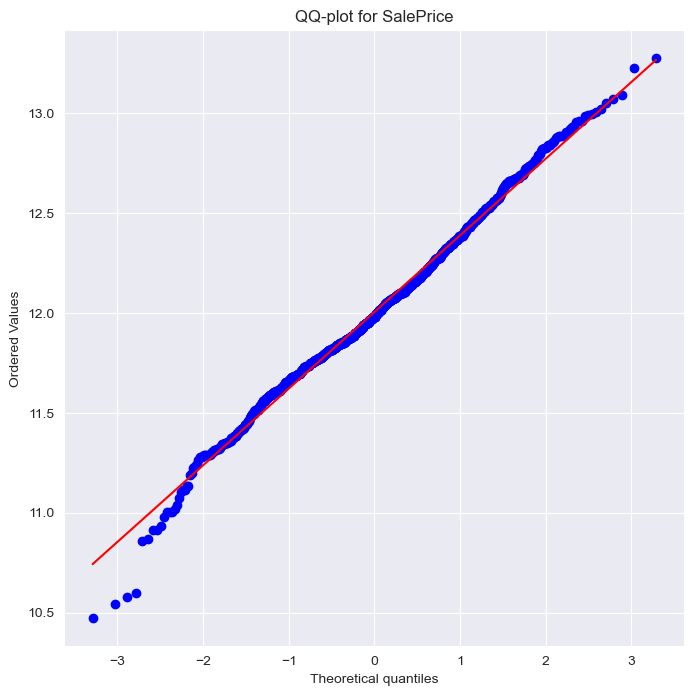

In [46]:
# Distribution plot
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, density=True, alpha=0.7, color='blue')

# Fitted normal distribution curve
(mu, sigma) = norm.fit(df['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Legend and labels
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma), 'SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()

# QQ-plot
plt.figure(figsize=(8, 8))
stats.probplot(df['SalePrice'], plot=plt)
plt.title('QQ-plot for SalePrice')
plt.show()

Inference - 

After Log Transformation target variable "SalePrice"looks well normalized now

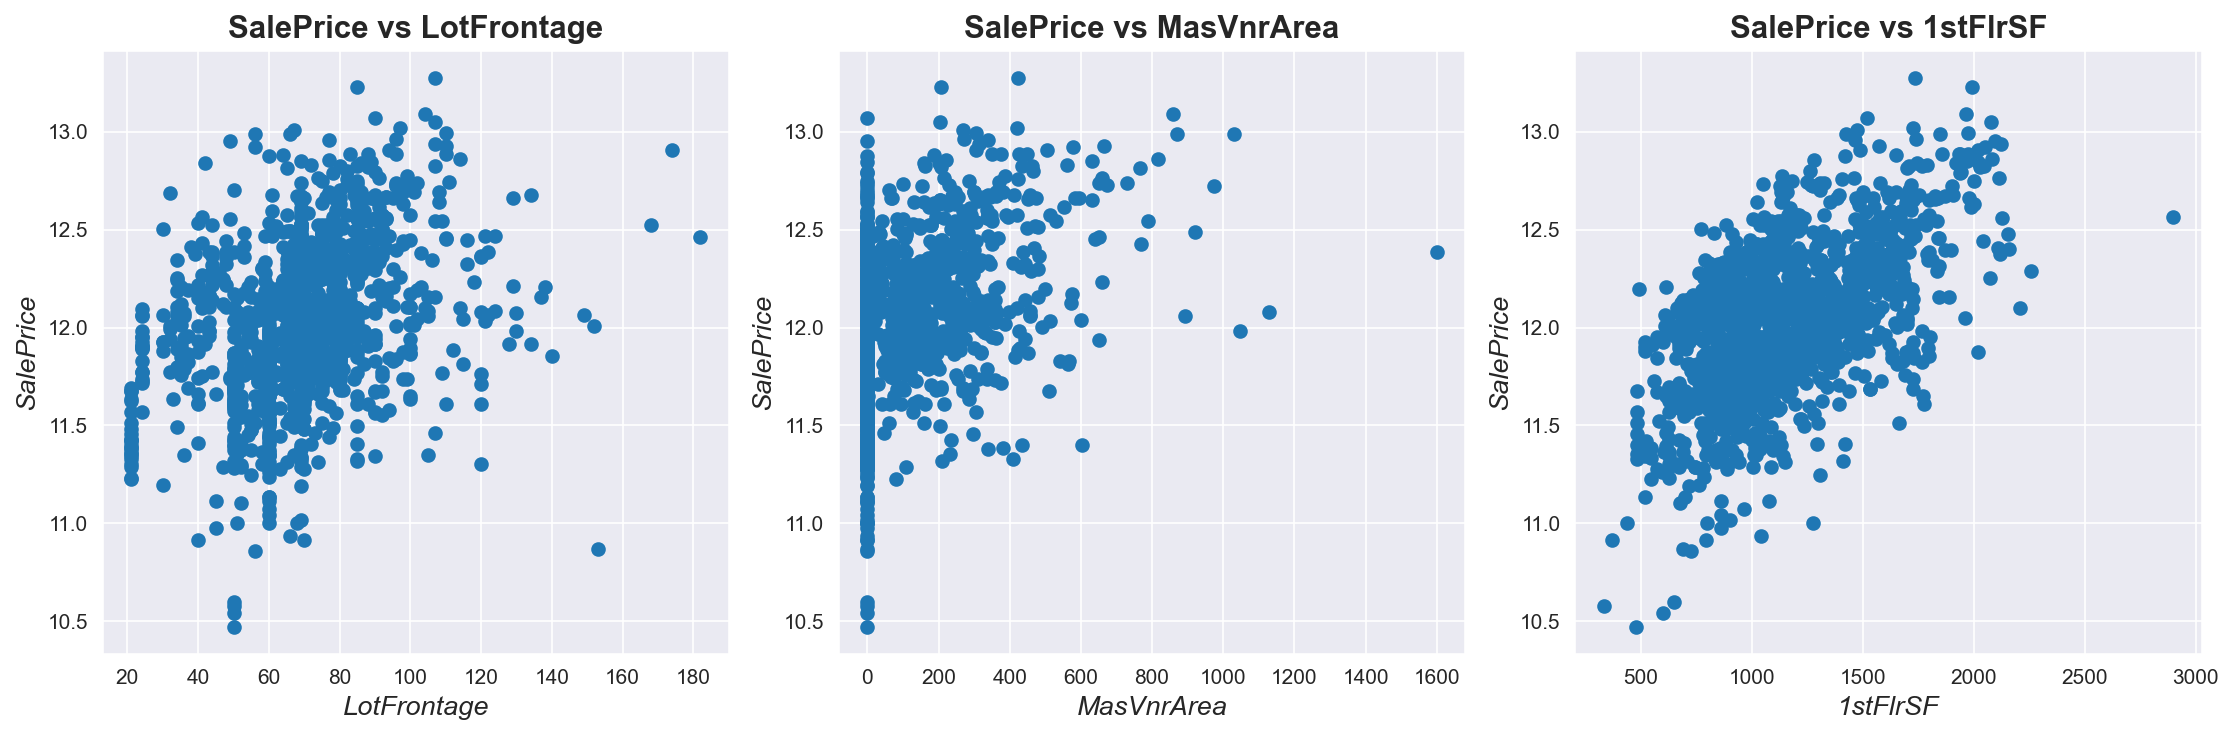

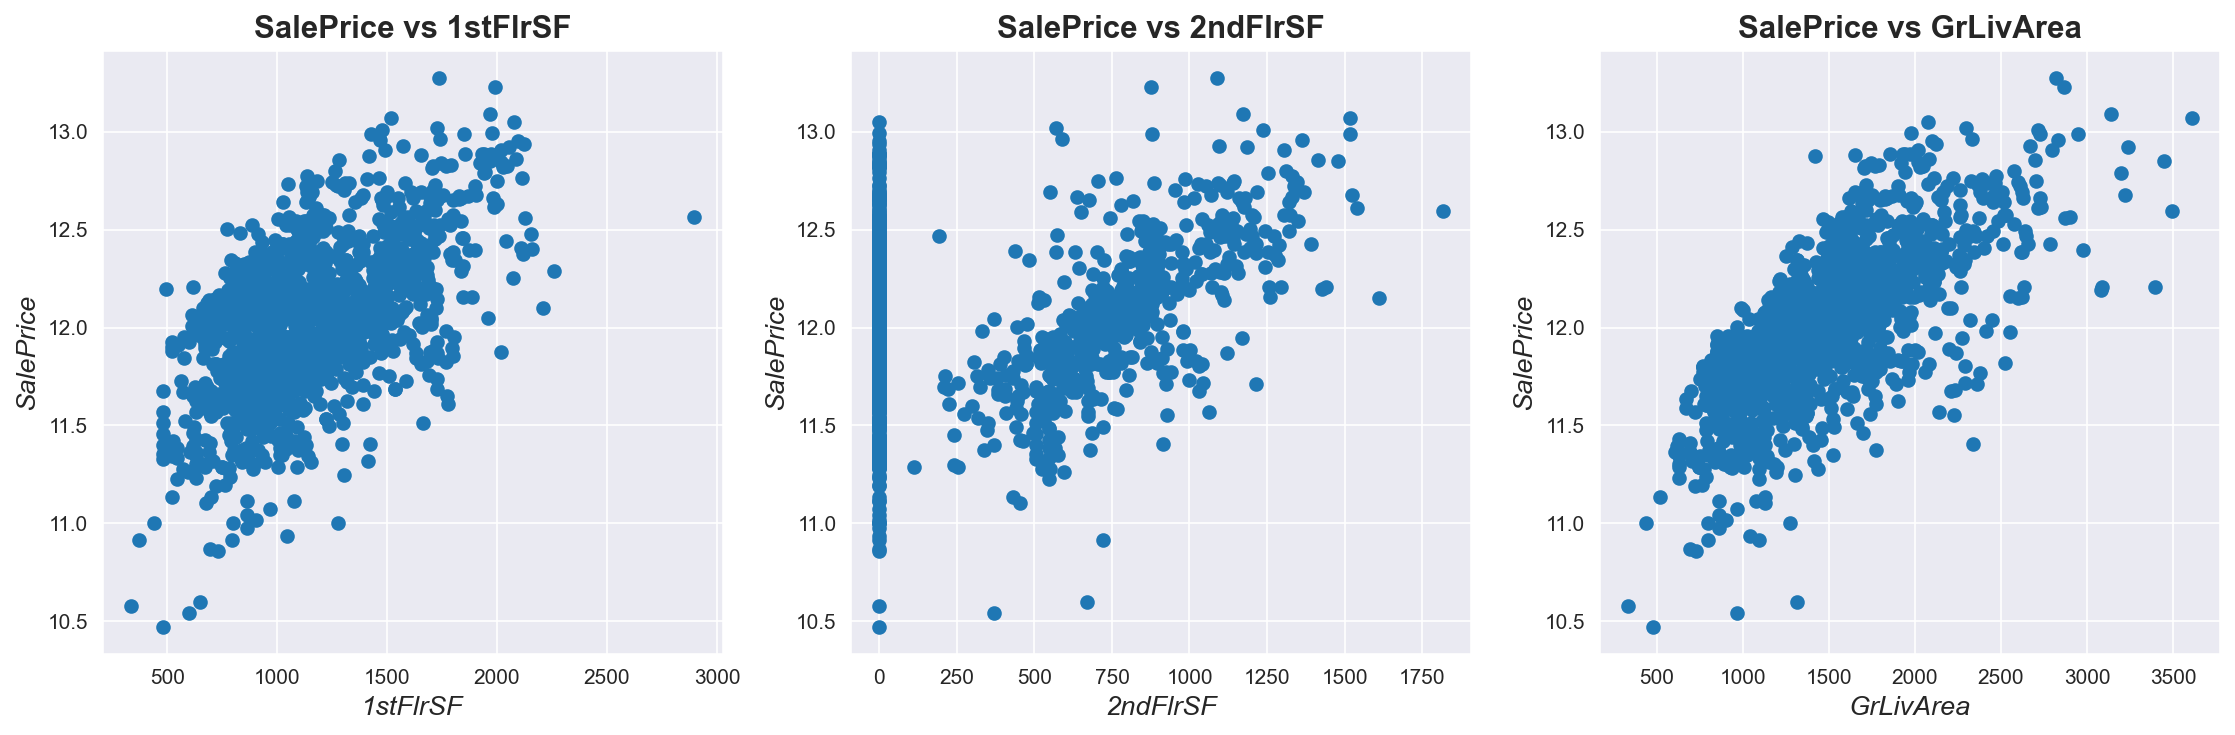

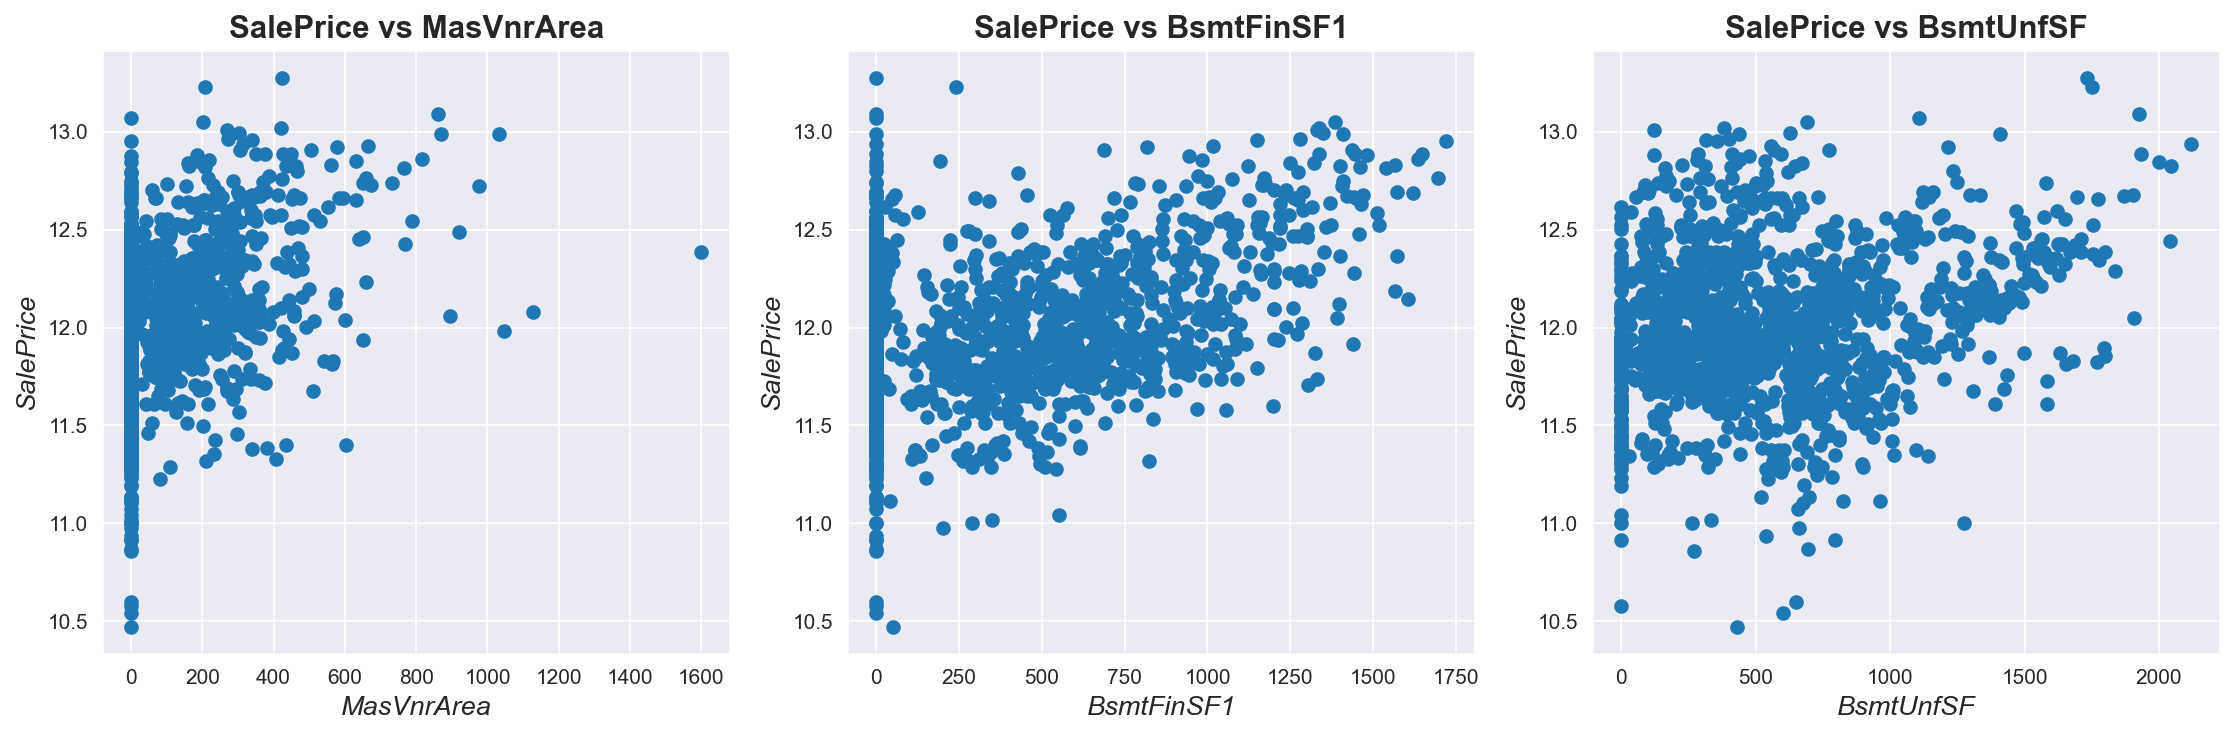

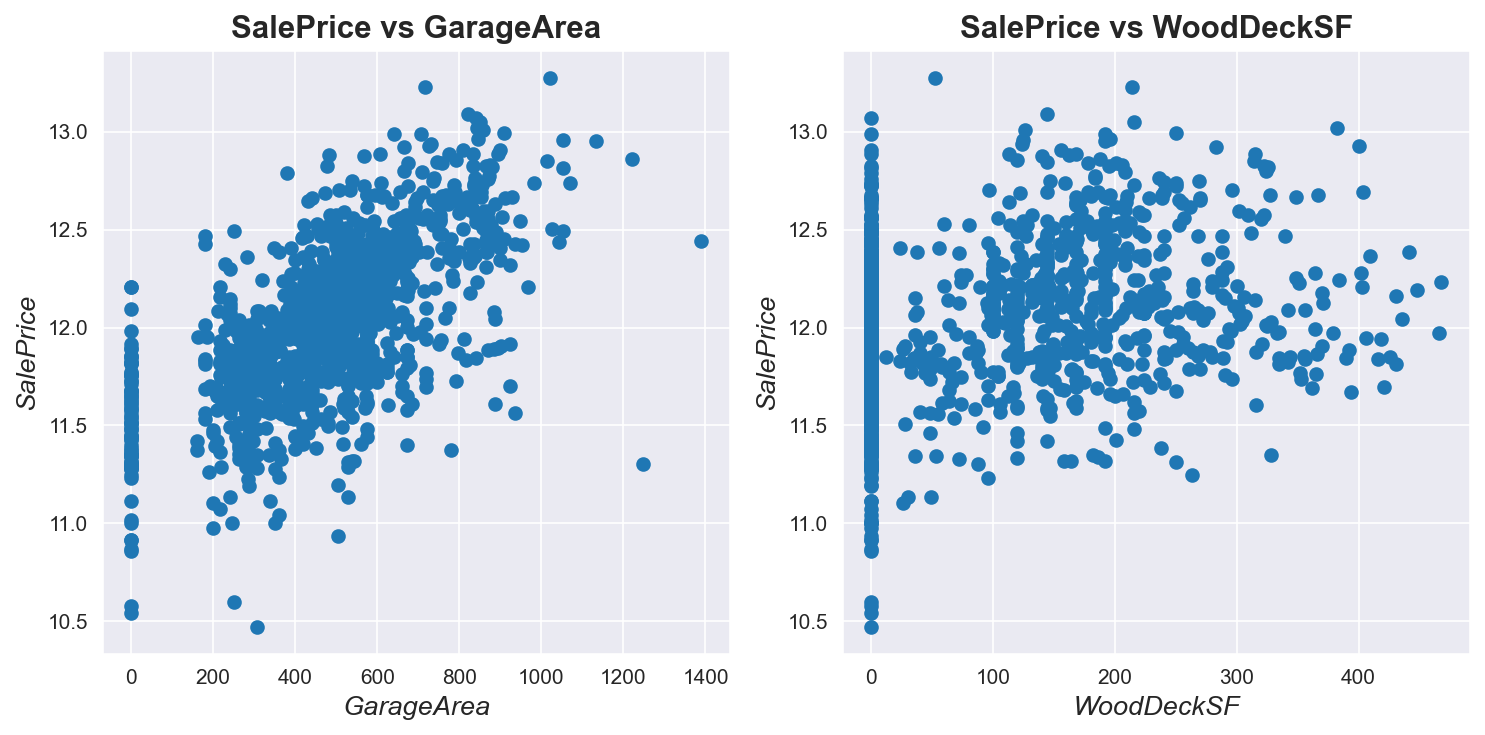

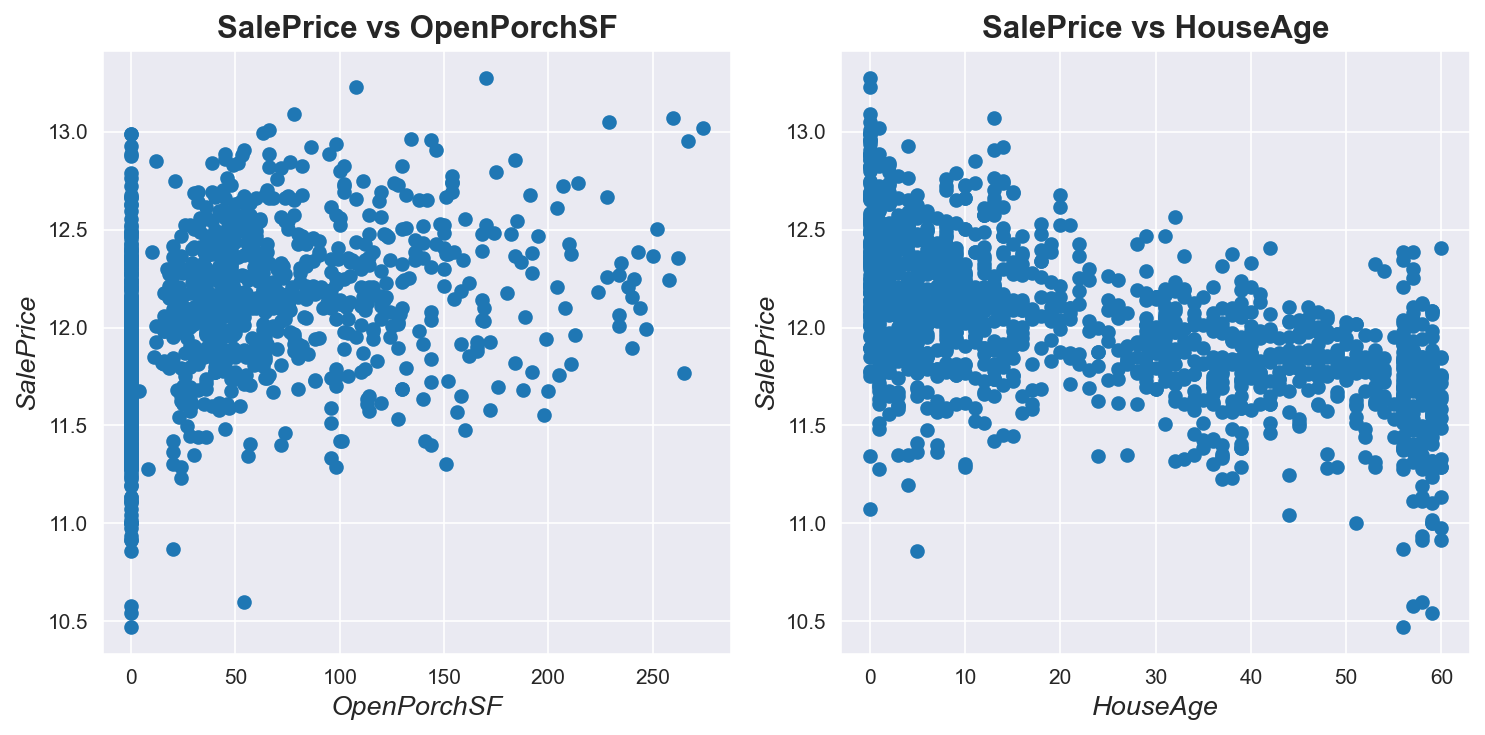

In [47]:
## to understand relationship between 'target variable' and 'numercial varibal'

def scatter_plots(variables, target='SalePrice'):
    num_plots = len(variables)
    plt.figure(figsize=(5 * num_plots, 5), dpi=150)
    
    for i, var in enumerate(variables, 1):
        plt.subplot(1, num_plots, i)
        plt.scatter(x=df[var], y=df[target])
        plt.title(f"{target} vs {var}", fontweight='bold', fontsize=15)
        plt.xlabel(var, fontsize=13, fontstyle='italic')
        plt.ylabel(target, fontsize=13, fontstyle='italic')
        plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()


scatter_plots(['LotFrontage', 'MasVnrArea', '1stFlrSF',])
scatter_plots(['1stFlrSF','2ndFlrSF', 'GrLivArea'])
scatter_plots(['MasVnrArea','BsmtFinSF1', 'BsmtUnfSF'])
scatter_plots([ 'GarageArea', 'WoodDeckSF'])
scatter_plots([ 'OpenPorchSF', 'HouseAge'])

In [48]:
##Based on the 'LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' scatterplots w.r.t. SalePrice, eliminating some outlier datapoints 

df = df.loc[~((df['SalePrice']<11.0) & (df['LotFrontage']>150))]
df = df.loc[~((df['SalePrice']>12.0) & (df['MasVnrArea']>1500))]
df = df.loc[~((df['SalePrice']>12.0) & (df['1stFlrSF']>2500))]
df = df.loc[~((df['SalePrice']<12.5) & (df['GarageArea']>1200))]

In [49]:
##Removing the highly correlated predictors to reduce multicollinearity  based on heatmap

df= df.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0    BrkFace       196.0        Gd      PConc       Gd           No   
1       None         0.0        TA     CBlock       Gd           Gd   
2    BrkFace       162.0        Gd      PConc       Gd           Mn   
3       None         0.0        TA     BrkTil       TA           No   
4    BrkFace       350.0        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0          GLQ         706           0        150          856        Ex   
1          ALQ         978           0        284         1262        Ex   
2          GLQ         486           0        434          920        Ex   
3          ALQ         216           0        540          756        Gd   
4          GLQ         655           0        490         1145        Ex   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  Fireplaces FireplaceQu GarageType  \
0             3             1          Gd           0        None     Attchd   
1             3             1          TA           1          TA     Attchd   
2             3             1          Gd           1          TA     Attchd   
3             3             1          Gd           1          Gd     Detchd   
4             4             1          Gd           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2003          RFn         548           0           61   
1         1976          RFn         460         298            0   
2         2001          RFn         608           0           42   
3         1998          Unf         642           0           35   
4         2000          RFn         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0  12.247694   
1              0          0            0         0        0  12.109011   
2              0          0            0         0        0  12.317167   
3            272          0            0         0        0  11.849398   
4              0          0            0         0        0  12.429216   

   HouseAge  
0         5  
1        31  
2         6  
3        36  
4         8

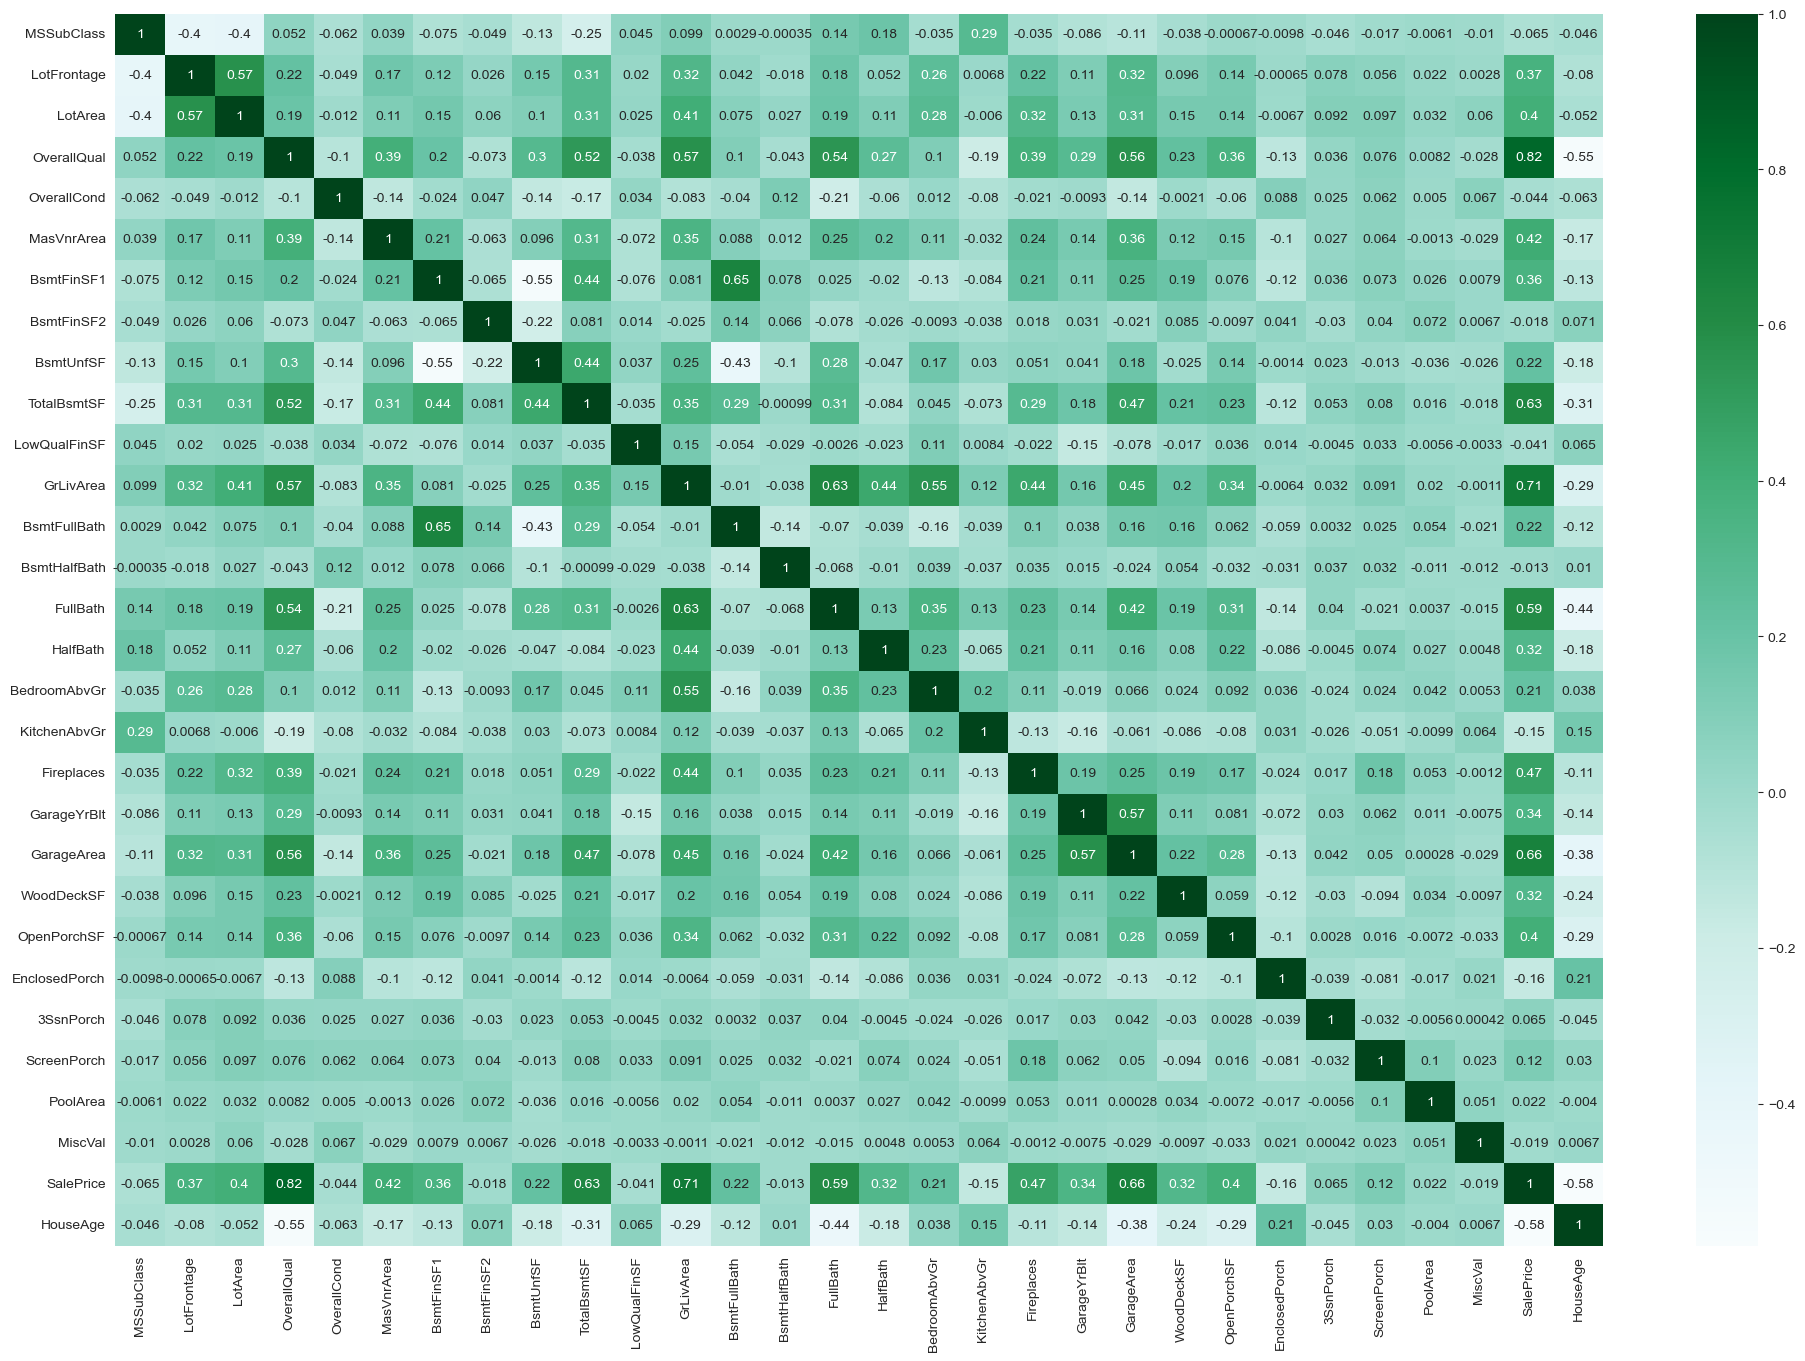

In [50]:
num_col = list(df.select_dtypes(['int','float']).columns)
plt.figure(figsize=(24,16))
sns.heatmap(df[num_col].corr(), cmap='BuGn', annot = True)
plt.show()

# 5.2 Data Preparation

Converting categorical variable into numerical variable using Data Dictionary

In [51]:
##For ordinals, let's assign them their respective weights.
df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotConfig Neighborhood  \
0          60       RL         65.0     8450    Inside      CollgCr   
1          20       RL         80.0     9600       FR2      Veenker   
2          60       RL         68.0    11250    Inside      CollgCr   
3          70       RL         60.0     9550    Corner      Crawfor   
4          60       RL         84.0    14260       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0    BrkFace       196.0      PConc         706           0        150   
1       None         0.0     CBlock         978           0        284   
2    BrkFace       162.0      PConc         486           0        434   
3       None         0.0     BrkTil         216           0        540   
4    BrkFace       350.0      PConc         655           0        490   

   TotalBsmtSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          856             0       1710             1             0         2   
1         1262             0       1262             0             1         2   
2          920             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1145             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces GarageType  GarageYrBlt  \
0         1             3             1           0     Attchd         2003   
1         0             3             1           1     Attchd         1976   
2         1             3             1           1     Attchd         2001   
3         0             3             1           1     Detchd         1998   
4         1             4             1           1     Attchd         2000   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  HouseAge  d_LotShape  d_ExterQual  \
0         0        0  12.247694         5           3            4   
1         0        0  12.109011        31           3            3   
2         0        0  12.317167         6           2            4   
3         0        0  11.849398        36           2            3   
4         0        0  12.429216         8           2            4   

   d_BsmtQual  d_BsmtExposure  d_BsmtFinType1  d_HeatingQC  d_KitchenQual  \
0           4               1               6            5              4   
1           4               4               5            5              3   
2           4               2               6            5              4   
3           3               1               5            4              4   
4           4               3               6            5              4   

   d_FireplaceQu  d_GarageFinish  
0              0               2  
1              3               2  
2              3               2  
3              4               1  
4              3               2

In [52]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass', drop_first = True)
df = pd.concat([df, d_MSSubClass], axis = 1)

##Creating dummies for 'LotConfigs'
d_LotConfigs = pd.get_dummies(df['LotConfig'], prefix='LotConfig', drop_first = True)
df = pd.concat([df, d_LotConfigs], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

##Creating dummies for 'HouseStyle'
d_HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', drop_first = True)
df = pd.concat([df, d_HouseStyle], axis = 1)

##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

##Creating dummies for 'MasVnrType'
d_MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
df = pd.concat([df, d_MasVnrType], axis = 1)

##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)


##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', \
              'GarageType',  'LotConfig' ,'HouseStyle', 'MasVnrType']
df = df.drop(orig_before_dum_cols, axis=1)

In [53]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           0        150          856             0       1710             1   
1           0        284         1262             0       1262             0   
2           0        434          920             0       1786             1   
3           0        540          756             0       1717             1   
4           0        490         1145             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
0             0         2         1             3             1           0   
1             1         2         0             3             1           1   
2             0         2         1             3             1           1   
3             0         1         0             3             1           1   
4             0         2         1             4             1           1   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         2003         548           0           61              0          0   
1         1976         460         298            0              0          0   
2         2001         608           0           42              0          0   
3         1998         642           0           35            272          0   
4         2000         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  SalePrice  HouseAge  d_LotShape  \
0            0         0        0  12.247694         5           3   
1            0         0        0  12.109011        31           3   
2            0         0        0  12.317167         6           2   
3            0         0        0  11.849398        36           2   
4            0         0        0  12.429216         8           2   

   d_ExterQual  d_BsmtQual  d_BsmtExposure  d_BsmtFinType1  d_HeatingQC  \
0            4           4               1               6            5   
1            3           4               4               5            5   
2            4           4               2               6            5   
3            3           3               1               5            4   
4            4           4               3               6            5   

   d_KitchenQual  d_FireplaceQu  d_GarageFinish  MSSubClass_30  MSSubClass_40  \
0              4              0               2          False          False   
1              3              3               2          False          False   
2              4              3               2          False          False   
3              4              4               1          False          False   
4              4              3               2          False          False   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0          False          False           True          False          False   
1          False          False          False          False          False   
2          False          False           True          False          False   
3          False          False          False           True          False   
4          False          False           True          False          False   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0          False          False          False           False   
1          False          False          False           False   
2          False          False          False           Fa

In [54]:
##Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

df_corr = df.drop(['SalePrice'],axis =1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
col_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

['d_ExterQual',
 'd_BsmtFinType1',
 'd_KitchenQual',
 'd_FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Foundation_PConc',
 'MasVnrTyp_None',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_Detchd',
 'GarageType_None']

In [55]:
##Dropping independent predictors highly correlated to each other
df = df.drop(col_to_drop, axis=1)

In [56]:
df.shape

(1381, 116)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 0 to 1458
Columns: 116 entries, LotFrontage to GarageType_CarPort
dtypes: bool(82), float64(3), int32(1), int64(30)
memory usage: 482.8 KB


Inference - Converted all categorical columns to numerical


In [58]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)
print(binary_cols)

['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Ex

# Step 6: Data splitting

# 6.1- Train-Test Split

In [59]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [60]:


##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [61]:
print(df_train.shape)
print(df_test.shape)

(966, 116)
(415, 116)


In [62]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [63]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

In [64]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Step 7 - Feature Scaling continuous variables

To make all features on same scale for ease in interpretation

In [65]:
#Cut down number of features to 50 using automated approach
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=50)

selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = selector.support_

# Print or use the selected features
print("Selected Features:", selected_features)

Selected Features: [ True  True  True  True False  True  True  True  True False  True False
 False  True  True False  True  True  True  True  True False False False
 False False False  True False  True False False False  True False False
 False  True False False  True False  True False  True False False  True
 False False False  True False  True False False False False False False
  True False  True  True False  True False  True False  True  True  True
  True False  True False False  True False  True False False False False
 False False False  True False  True False False False  True  True False
  True  True  True False  True False False False False  True  True False
 False  True False False False False  True]


In [66]:
###Columns selected by RFE and their weights
my_zip=list(zip(X_train.columns,selector.support_,selector.ranking_))
my_zip

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 48),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('LowQualFinSF', False, 61),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 15),
 ('BsmtHalfBath', False, 59),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 49),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 43),
 ('EnclosedPorch', False, 52),
 ('3SsnPorch', False, 53),
 ('ScreenPorch', False, 33),
 ('PoolArea', False, 66),
 ('MiscVal', False, 35),
 ('HouseAge', True, 1),
 ('d_LotShape', False, 57),
 ('d_BsmtQual', True, 1),
 ('d_BsmtExposure', False, 39),
 ('d_HeatingQC', False, 21),
 ('d_GarageFinish', False, 54),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 38),
 ('MSSubClass_45', False, 64),
 ('MSSubC

In [67]:
X_train.columns[selector.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'HouseAge', 'd_BsmtQual', 'MSSubClass_30',
       'MSSubClass_60', 'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_160',
       'LotConfig_CulDSac', 'MSZoning_FV', 'MSZoning_RL',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_StoneBr', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace',
       'Exterior2nd_Stone', 'Exterior2nd_VinylSd', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'MasVnrTyp_Stone', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_Stone', 'GarageT

In [68]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)
top50_df

Features  rfe_support  rfe_ranking
0            LotFrontage         True            1
1                LotArea         True            1
2            OverallQual         True            1
3            OverallCond         True            1
4             BsmtFinSF1         True            1
5             BsmtFinSF2         True            1
6              BsmtUnfSF         True            1
7            TotalBsmtSF         True            1
8              GrLivArea         True            1
9               FullBath         True            1
10              HalfBath         True            1
11          KitchenAbvGr         True            1
12            Fireplaces         True            1
13           GarageYrBlt         True            1
14            GarageArea         True            1
15            WoodDeckSF         True            1
16              HouseAge         True            1
17            d_BsmtQual         True            1
18         MSSubClass_30         True            1
19         MSSubClass_60         True            1
20         MSSubClass_80         True            1
21         MSSubClass_90         True            1
22        MSSubClass_160         True            1
23     LotConfig_CulDSac         True            1
24           MSZoning_FV         True            1
25           MSZoning_RL         True            1
26  Neighborhood_Edwards         True            1
27   Neighborhood_IDOTRR         True            1
28  Neighborhood_MeadowV         True            1
29    Neighborhood_NAmes         True            1
30   Neighborhood_NWAmes         True            1
31  Neighborhood_NridgHt         True            1
32  Neighborhood_OldTown         True            1
33    Neighborhood_SWISU         True            1
34   Neighborhood_Sawyer         True            1
35  Neighborhood_StoneBr         True            1
36   Exterior2nd_AsphShn         True            1
37   Exterior2nd_BrkFace         True            1
38     Exterior2nd_Stone         True            1
39   Exterior2nd_VinylSd         True            1
40     HouseStyle_2.5Fin         True            1
41     HouseStyle_2.5Unf         True            1
42       Foundation_Slab         True            1
43      Foundation_Stone         True            1
44       Foundation_Wood         True            1
45       MasVnrTyp_Stone         True            1
46   Exterior1st_AsphShn         True            1
47   Exterior1st_BrkComm         True            1
48     Exterior1st_Stone         True            1
49    GarageType_CarPort         True            1

In [69]:
col = X_train.columns[selector.support_]


In [70]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe =X_train[col]

In [71]:
##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

#  Step 8: Model Building and Evaluation

## 8.1 Ridge Regression

In [72]:
## list of alphas (lambda parameter): Ridge Regression Model

params ={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
#Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.208126        -0.219386                1
14         3.0         -0.208526        -0.219420                2
15         4.0         -0.208938        -0.219510                3
16         5.0         -0.209349        -0.219684                4
12         1.0         -0.207800        -0.219732                5
11         0.9         -0.207782        -0.219804                6
10         0.8         -0.207768        -0.219893                7
17         6.0         -0.209753        -0.219914                8
9          0.7         -0.207754        -0.219996                9
8          0.6         -0.207739        -0.220107               10
18         7.0         -0.210149        -0.220178               11
7          0.5         -0.207725        -0.220231               12
6          0.4         -0.207710        -0.220371               13
19         8.0         -0.210552        -0.220408               14
5          0.3         -0.207692        -0.220526               15
20         9.0         -0.210956        -0.220635               16
4          0.2         -0.207676        -0.220703               17
21        10.0         -0.211360        -0.220847               18
3          0.1         -0.207663        -0.220919               19
22          11         -0.211771        -0.221061               20
2         0.01         -0.207652        -0.221193               21
1        0.001         -0.207650        -0.221226               22
0       0.0001         -0.207650        -0.221229               23
23          12         -0.212177        -0.221286               24
24          13         -0.212572        -0.221504               25
25          14         -0.212951        -0.221716               26
26          15         -0.213319        -0.221949               27
27          16         -0.213679        -0.222176               28
28          17         -0.214026        -0.222413               29
29          18         -0.214368        -0.222641               30
30          19         -0.214696        -0.222860               31
31          20         -0.215010        -0.223081               32
32          50         -0.221320        -0.228233               33
33         100         -0.226376        -0.232448               34
34         500         -0.251357        -0.255526               35
35        1000         -0.283023        -0.285607               36

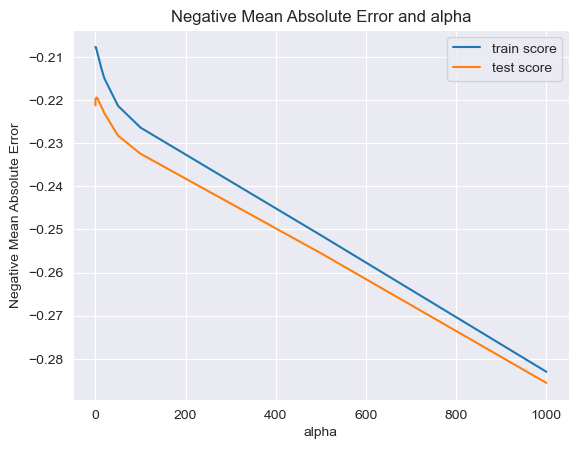

In [74]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [76]:
##Checking the coefficient values with lambda (alpha) = 2.0

ridge = Ridge(alpha=2.0)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.08497530729762931
Coefficients:
 [ 0.04169069  0.04436077  0.23273922  0.11104578  0.11278456  0.01743531
  0.01321663  0.14298948  0.24994196  0.05063497  0.04746065 -0.0578179
  0.04650982  0.04933227  0.09692671  0.02873382 -0.08387156  0.05492156
 -0.19727987  0.03205667  0.03769421  0.08266058 -0.19084942  0.08002977
  0.34495764  0.13048681 -0.11729743 -0.33663247 -0.11607262 -0.13940203
 -0.16285753  0.14118334 -0.28240064 -0.10332139 -0.16601062  0.31343808
  0.07773304  0.2122618   0.23281815  0.07492352 -0.09156345 -0.06387415
  0.28188798  0.13200606 -0.28141746  0.09284867  0.         -0.41103094
  0.05912598 -0.18606825]


### 8.2 Model Prediction and Evaluation Metrics for Ridge 

In [77]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=2.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=2.0):
 ****************************************

For Train Set:
R2 score: 0.9168892364761739 
MSE score: 0.08311076352382606 
MAE score: 0.20895656282126895 
RMSE score: 0.28828937462873316

For Test Set:
R2 score: 0.8887449639711062 
MSE score: 0.10785434533565937 
MAE score: 0.2249407929854833 
RMSE score: 0.3284118532204028 
 ****************************************


In [78]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0   Exterior1st_BrkComm      -0.4110                            0.4110
1           MSZoning_FV       0.3450                            0.3450
2   Neighborhood_IDOTRR      -0.3366                            0.3366
3  Neighborhood_StoneBr       0.3134                            0.3134
4  Neighborhood_OldTown      -0.2824                            0.2824
5       Foundation_Slab       0.2819                            0.2819
6       Foundation_Wood      -0.2814                            0.2814
7             GrLivArea       0.2499                            0.2499
8     Exterior2nd_Stone       0.2328                            0.2328
9           OverallQual       0.2327                            0.2327

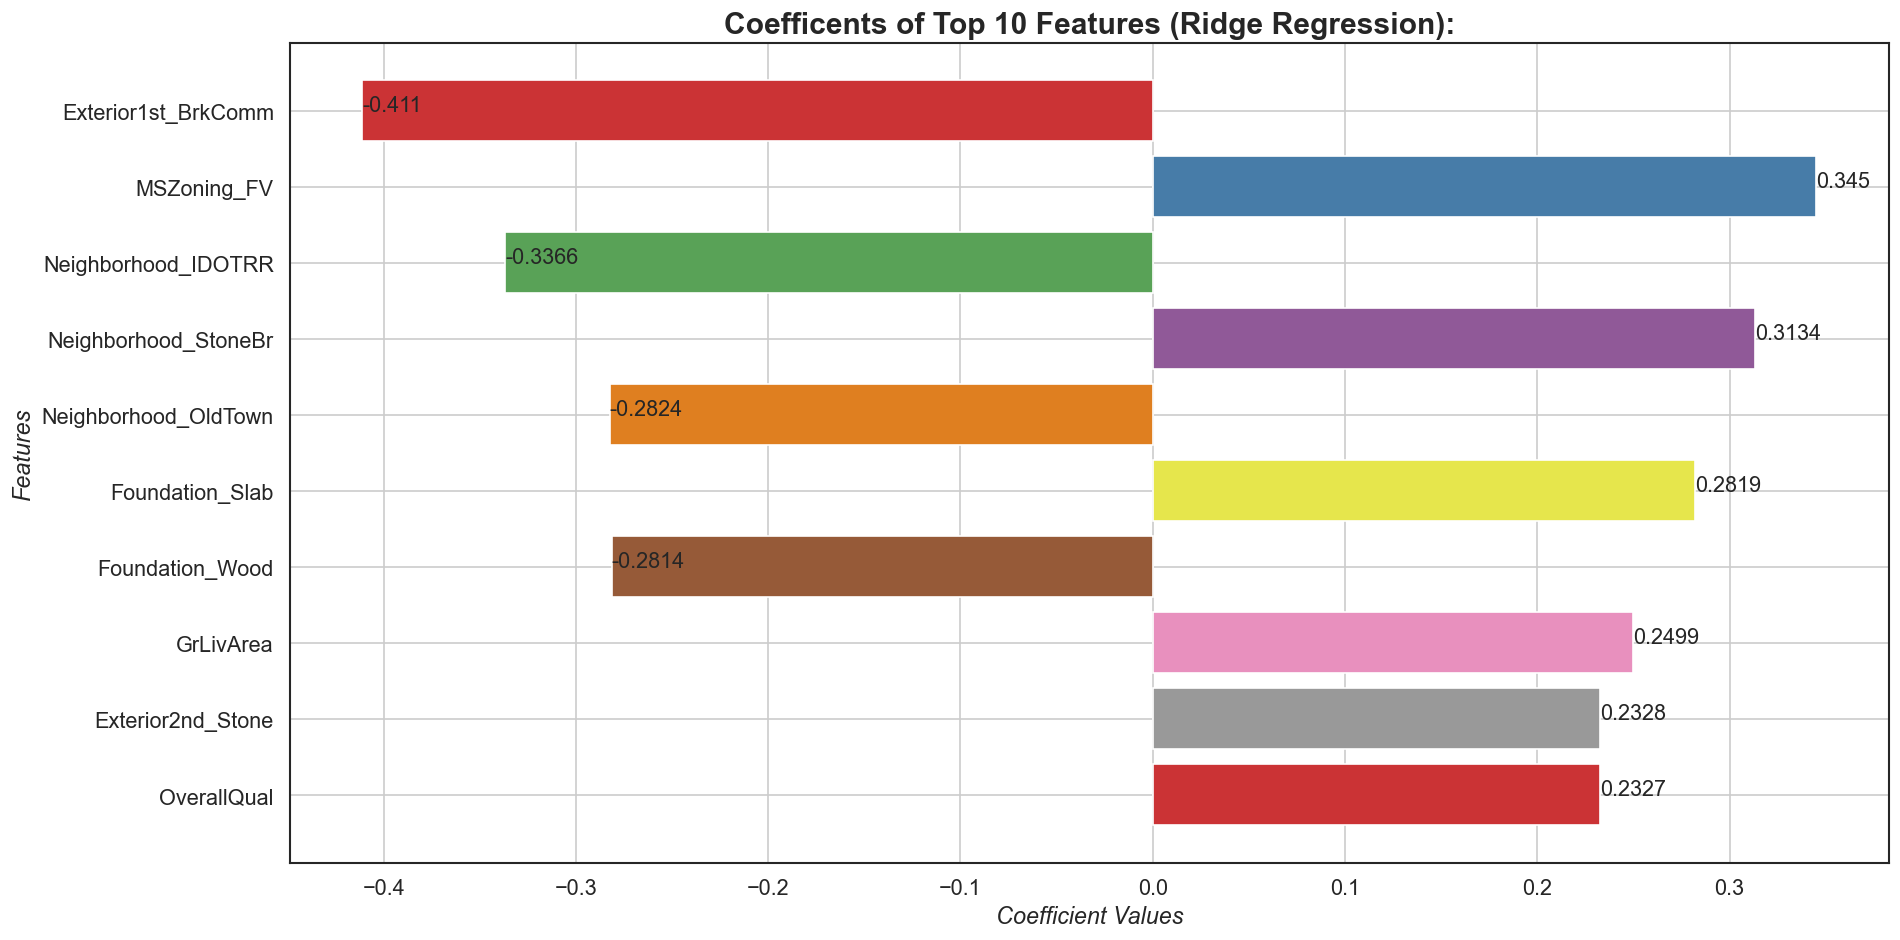

In [79]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


Inference - 

Top 10 features based on Ridge regression which are useful for predicting the sale price of the house

### 8.3 : Residual analysis of Ridge Regression model

for train set

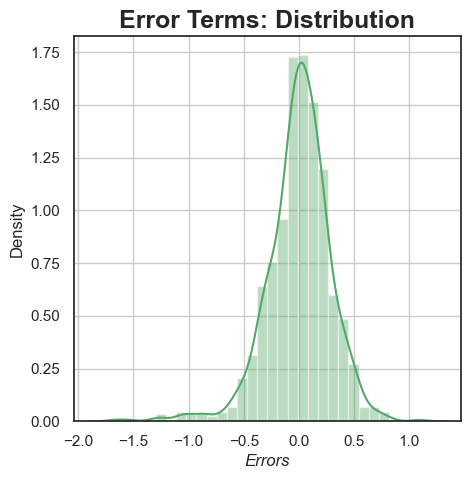

In [80]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Inference- 

Errors are normally distribured here with mean 0. So model is working fine

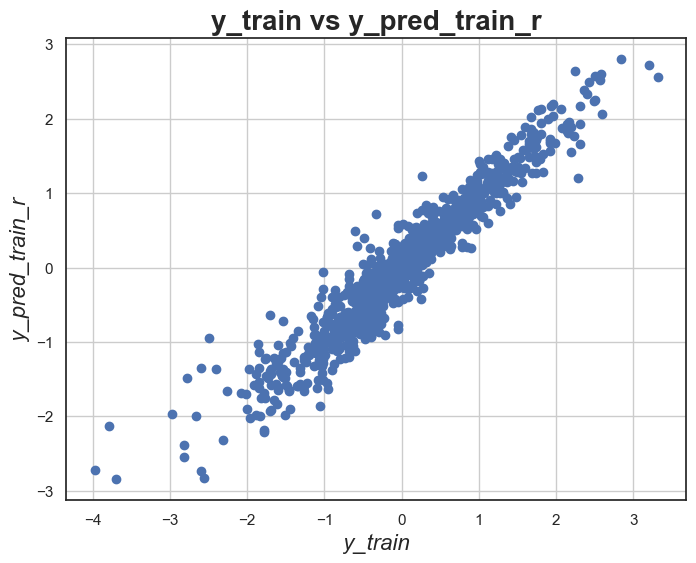

In [81]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [82]:
y_train.shape

(966,)

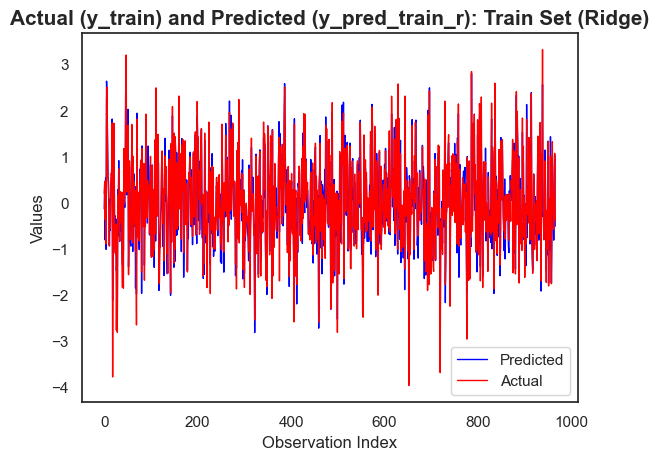

In [83]:
import matplotlib.pyplot as plt

# Assuming y_pred_train_r is a NumPy array or Pandas Series
f = range(len(y_pred_train_r))

plt.plot(f, y_pred_train_r, color="blue", linewidth=1, linestyle="-", label="Predicted")
plt.plot(f, y_train, color="red", linewidth=1, linestyle="-", label="Actual")
plt.title("Actual (y_train) and Predicted (y_pred_train_r): Train Set (Ridge)", fontsize=15, fontweight='bold')
plt.xlabel("Observation Index")
plt.ylabel("Values")
plt.legend()
plt.show()

Inference-

Actual vs Predicted follows same pattern hence model seems to be ok.

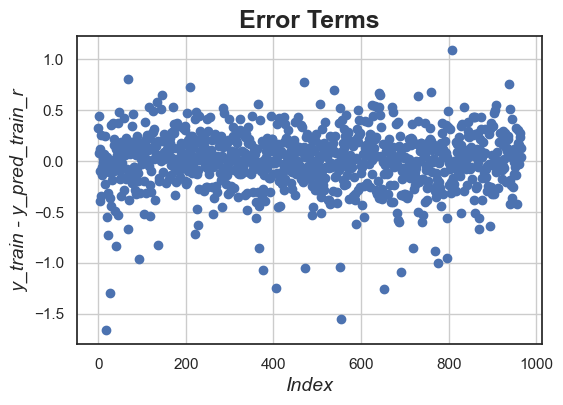

In [84]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,966,1)] #For 966 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j, res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

For Test train 

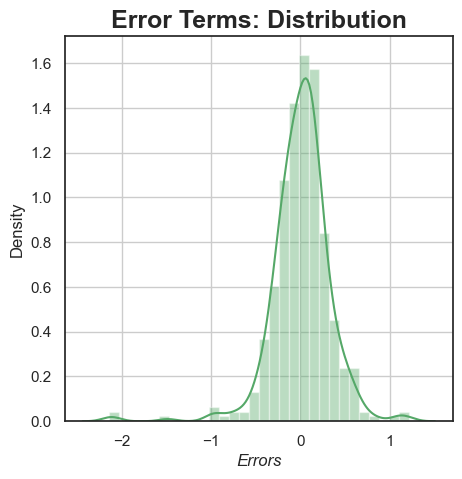

In [85]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Inference- 

Errors are normally distribured here with mean 0. So model is working fine on test set also

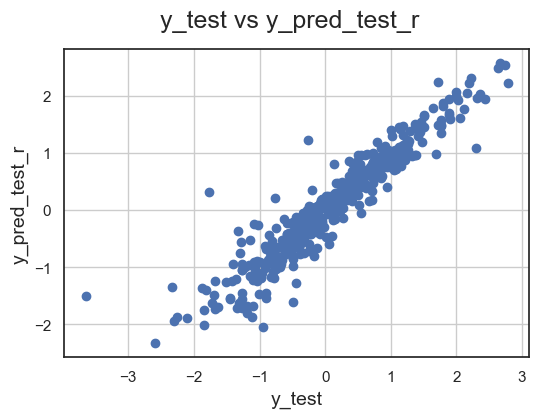

In [86]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

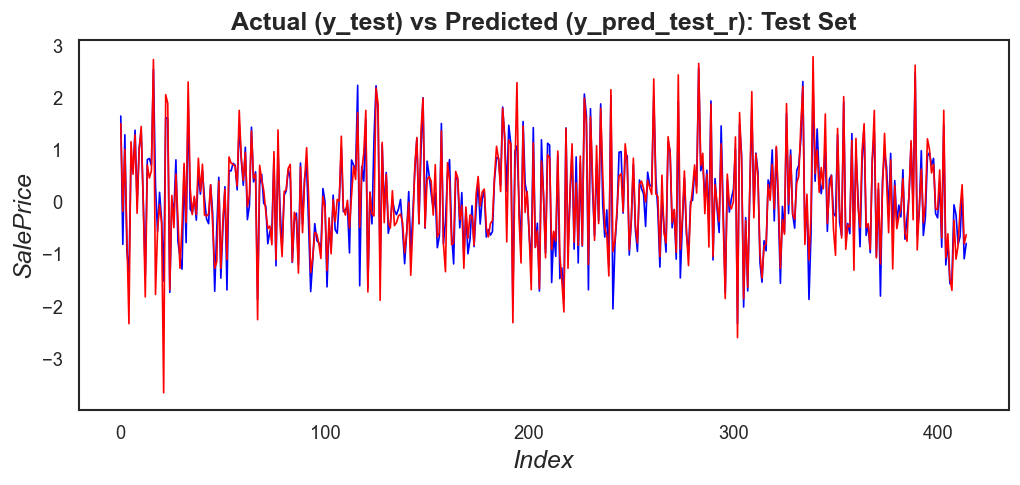

In [87]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p = [i for i in range(0,415,1)] #As test set has 415 observations
l = [i for i in range(0,415,1)]
plt.plot(p, y_pred_test_r, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_r' plot(test pred)
plt.plot(l, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_r): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

Inference-

Actual vs Predicted for Test data follows same pattern hence model seems to be ok.

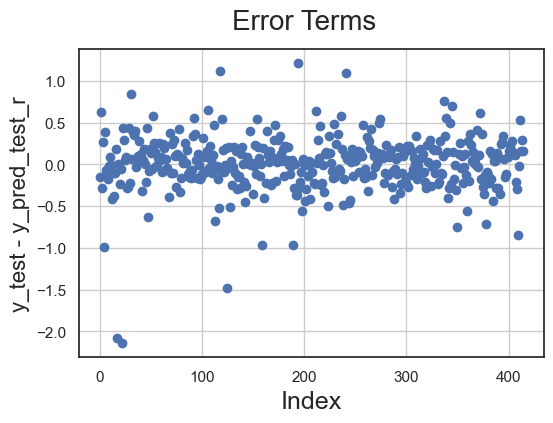

In [88]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,415,1)] #For 415 observations in the test set
res_test = (y_test-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

## 8.4 Lasso Regression

In [89]:
## list of alphas (lambda parameter): Ridge Regression Model

params ={'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
3       0.0003         -0.207842        -0.220366                1
2       0.0002         -0.207714        -0.220396                2
1       0.0001         -0.207666        -0.220747                3
4       0.0005         -0.208225        -0.220813                4
5       0.0006         -0.208463        -0.220933                5
6       0.0007         -0.208714        -0.221019                6
0      0.00001         -0.207654        -0.221164                7
7       0.0008         -0.209051        -0.221296                8
8       0.0009         -0.209453        -0.221587                9
9        0.001         -0.209875        -0.221854               10
10       0.002         -0.213843        -0.224289               11
11       0.003         -0.217621        -0.227135               12
12       0.004         -0.221325        -0.230135               13
13       0.005         -0.224560        -0.232369               14
14        0.01         -0.232695        -0.238992               15
15        0.05         -0.255520        -0.260769               16
16         0.1         -0.280451        -0.284203               17
17         0.2         -0.354180        -0.357503               18
18         0.3         -0.427922        -0.430457               19
19         0.4         -0.503736        -0.506022               20
20         0.5         -0.576048        -0.577835               21
21         0.6         -0.636055        -0.637773               22
22         0.7         -0.697506        -0.699012               23
23         0.8         -0.761580        -0.762717               24
37         100         -0.775470        -0.775675               25
36          50         -0.775470        -0.775675               25
35          20         -0.775470        -0.775675               25
34        10.0         -0.775470        -0.775675               25
33         9.0         -0.775470        -0.775675               25
32         8.0         -0.775470        -0.775675               25
31         7.0         -0.775470        -0.775675               25
29         5.0         -0.775470        -0.775675               25
38         500         -0.775470        -0.775675               25
28         4.0         -0.775470        -0.775675               25
27         3.0         -0.775470        -0.775675               25
26         2.0         -0.775470        -0.775675               25
25         1.0         -0.775470        -0.775675               25
24         0.9         -0.775470        -0.775675               25
30         6.0         -0.775470        -0.775675               25
39        1000         -0.775470        -0.775675               25

In [91]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

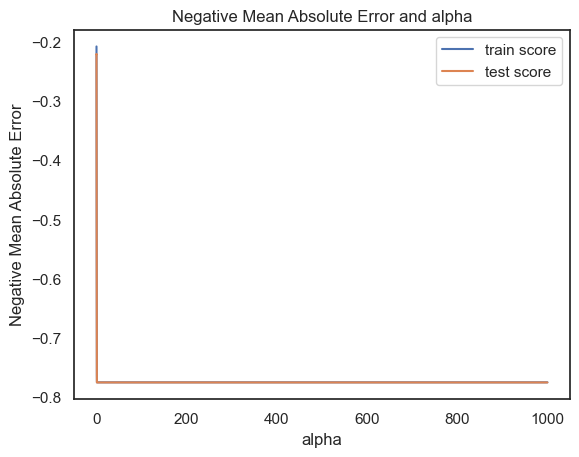

In [92]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [93]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003)

In [94]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.0003)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.08067411357871405
Coefficients:
  [ 0.04320455  0.04462339  0.23151857  0.11041599  0.09920388  0.01200296
 -0.          0.1545182   0.25165567  0.04755539  0.04744409 -0.05828408
  0.04492103  0.0495885   0.09723225  0.02905644 -0.08363867  0.05723243
 -0.20035395  0.02823884  0.03236811  0.06860086 -0.20048509  0.07704392
  0.35692133  0.12896652 -0.10906531 -0.35898957 -0.11028713 -0.14199497
 -0.16072116  0.14389193 -0.29066141 -0.104752   -0.1686334   0.33651105
  0.00915182  0.22381419  0.29090225  0.07268557 -0.06579412 -0.03519417
  0.3219053   0.13126184 -0.42706191  0.09008905  0.         -0.71139465
  0.         -0.19584216]


In [95]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.0003):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.0003):
 ****************************************

For Train Set:
R2 score: 0.9174421607935511 
MSE score: 0.08255783920644885 
MAE score: 0.20871547634234877 
RMSE score: 0.28732879982077825

For Test Set:
R2 score: 0.8877962610337671 
MSE score: 0.10877404962839955 
MAE score: 0.22613273845053983 
RMSE score: 0.32980911089355847 
 ****************************************


In [96]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0   Exterior1st_BrkComm      -0.7114                            0.7114
1       Foundation_Wood      -0.4271                            0.4271
2   Neighborhood_IDOTRR      -0.3590                            0.3590
3           MSZoning_FV       0.3569                            0.3569
4  Neighborhood_StoneBr       0.3365                            0.3365
5       Foundation_Slab       0.3219                            0.3219
6     Exterior2nd_Stone       0.2909                            0.2909
7  Neighborhood_OldTown      -0.2907                            0.2907
8             GrLivArea       0.2517                            0.2517
9           OverallQual       0.2315                            0.2315

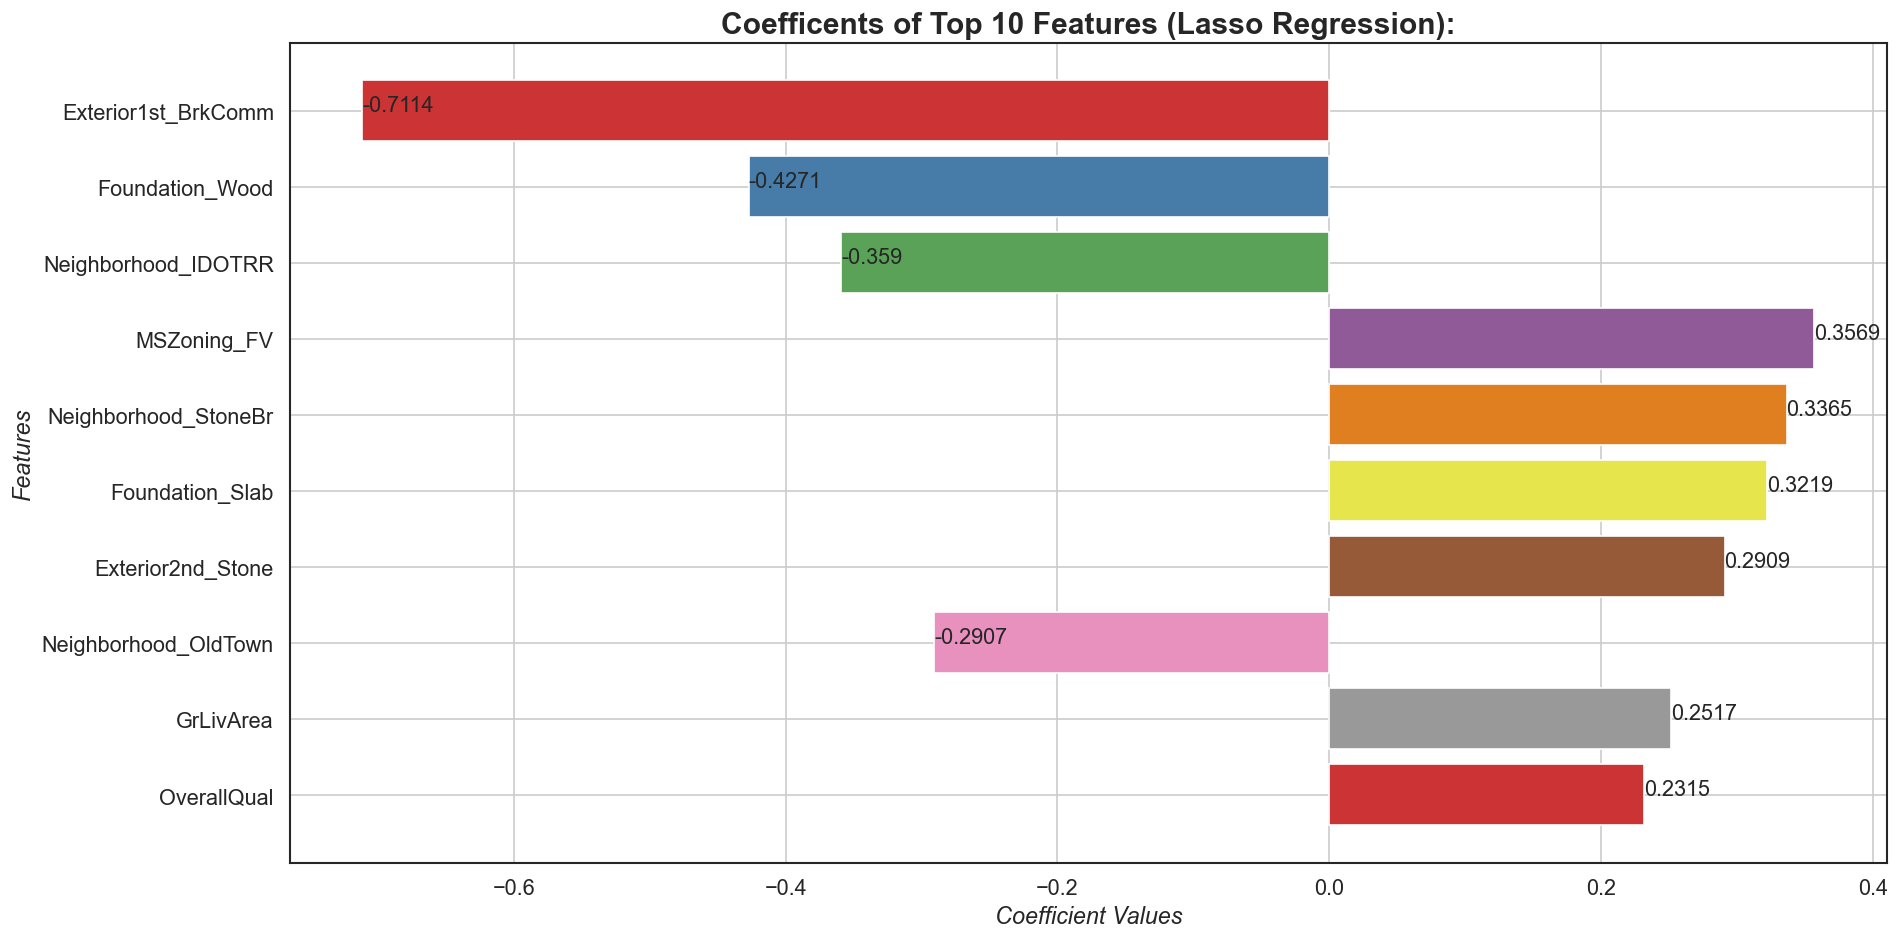

In [97]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


Inference - 

Top 10 features based on Lasso regression which are useful for predicting the sale price of the house

In [98]:
##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['Exterior1st_BrkComm',
 'Foundation_Wood',
 'Neighborhood_IDOTRR',
 'MSZoning_FV',
 'Neighborhood_StoneBr']

### 8.5 : Residual analysis of Lasso Regression model

for train set

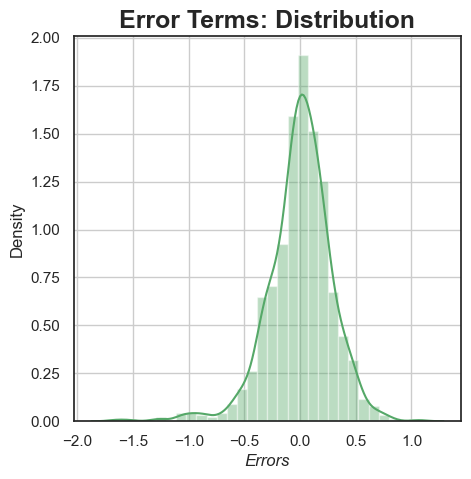

In [99]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Inference- 

Errors are normally distribured here with mean 0. So model is working fine

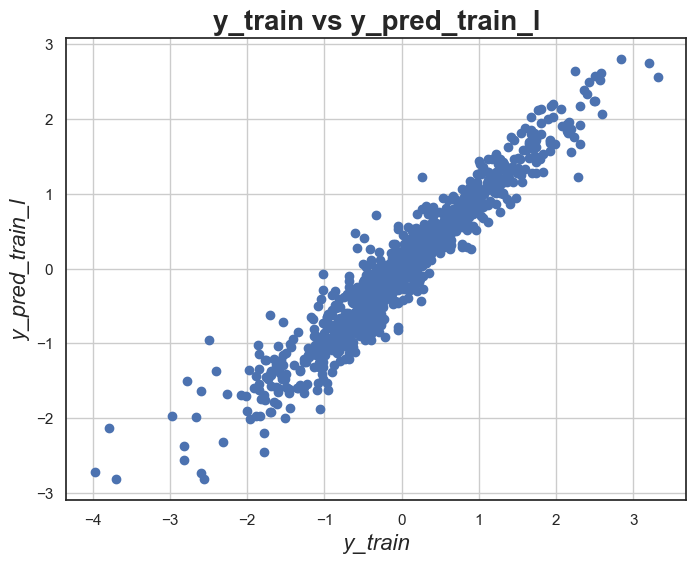

In [100]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [101]:
y_train.shape

(966,)

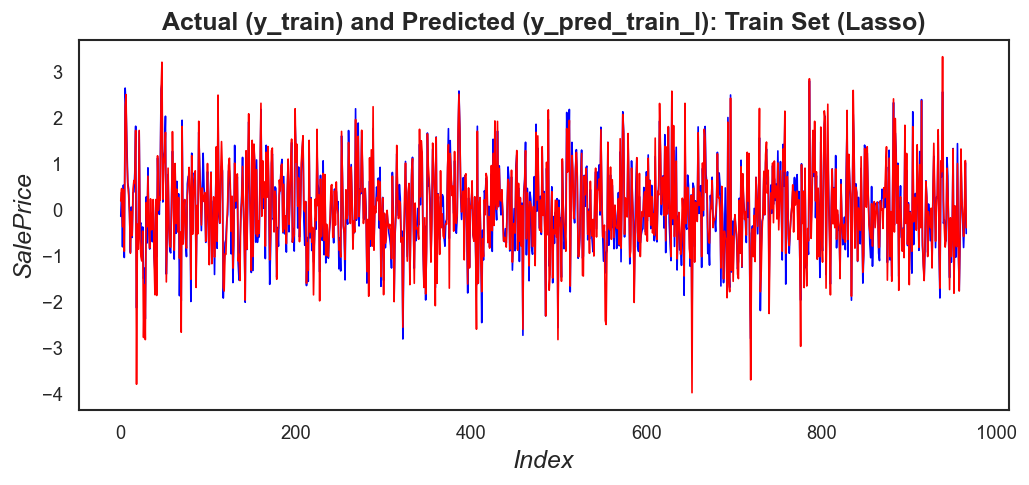

In [102]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f1 = [i for i in range(0,966,1)] #Since y_train has 966 observations
g1 = [i for i in range(0,966,1)]
plt.plot(f1, y_pred_train_l, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_l' plot
plt.plot(g1, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_l): Train Set (Lasso)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

Inference-

Actual vs Predicted follows same pattern hence model seems to be ok.

For test set

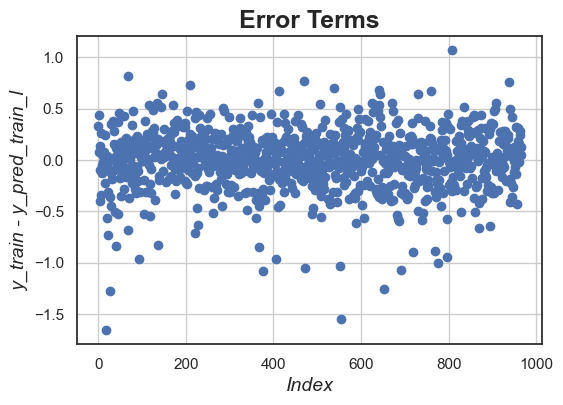

In [103]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,966,1)] #For 966 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

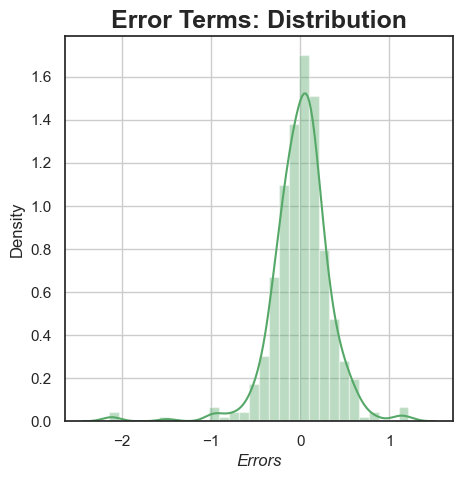

In [104]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Inference- 

Errors are normally distribured here with mean 0. So model is working fine on test set also

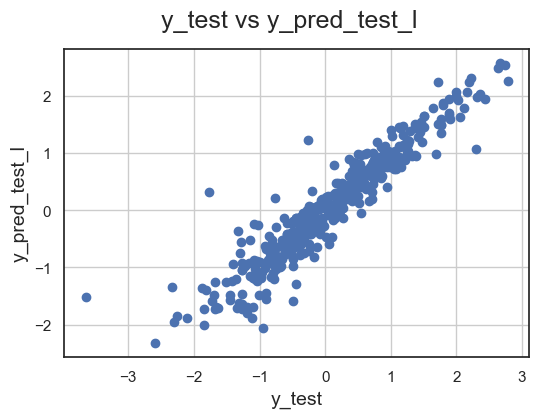

In [105]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()

In [106]:
y_test.shape

(415,)

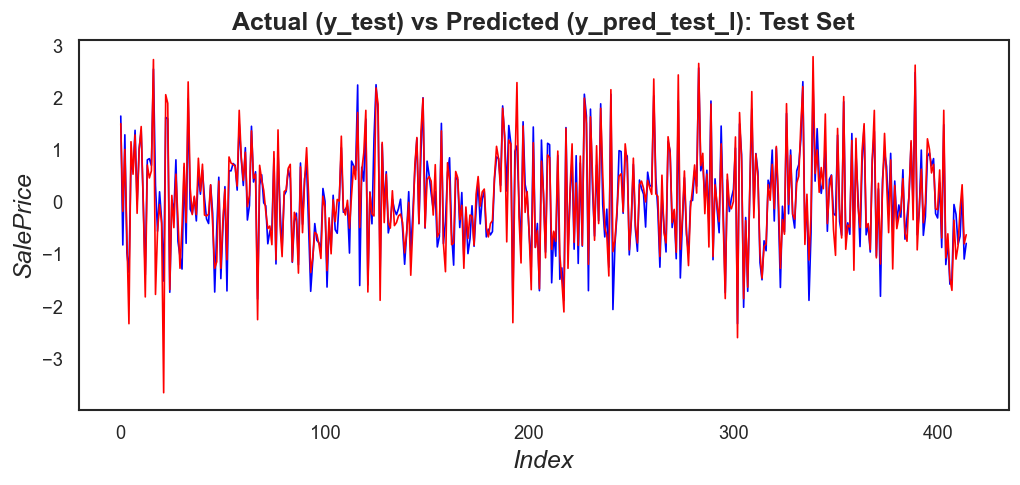

In [107]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p2 = [i for i in range(0,415,1)] #As test set has 415 observations
l2 = [i for i in range(0,415,1)]
plt.plot(p2, y_pred_test_l, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_l' plot(test pred)
plt.plot(l2, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_l): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

Inference-

Actual vs Predicted for Test data follows same pattern hence model seems to be ok.

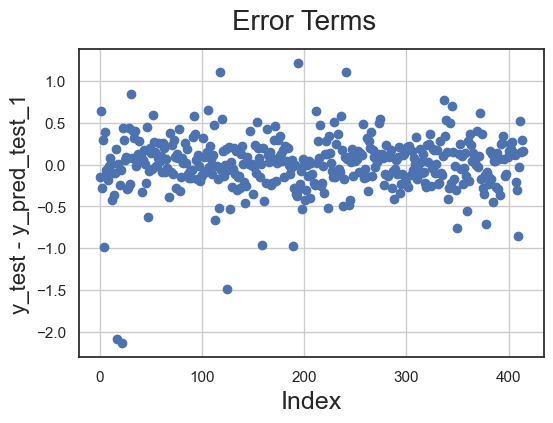

In [108]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,415,1)] #For 415 observations in the test set
res_test1 = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

# Subjective questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [109]:
##Optimal Value of alpha for ridge and lasso regression (importing values already computed)

optimal_alpha_ridge = 2.0        #(Computed Above: For Ridge Regression)
optimal_alpha_lasso = 0.0003    #(Computed Above: For Lasso Regression)

for Ridge regression 

In [110]:
##Checking the outcome: coefficient values with double the value of alpha = 2*2 = 4

ridge = Ridge(alpha=4)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.09139035166179339
Coefficients:
 [ 0.04065792  0.04499644  0.23829617  0.10907641  0.11303783  0.01711792
  0.01261051  0.14245809  0.24667707  0.05376945  0.04772089 -0.05570431
  0.04789826  0.04919197  0.09831586  0.02827321 -0.08640368  0.05287479
 -0.18698301  0.03270807  0.03510583  0.07938707 -0.17364897  0.07737475
  0.32304748  0.13202012 -0.10803963 -0.30219183 -0.09621457 -0.12483956
 -0.15246836  0.13013335 -0.2677971  -0.08799814 -0.15010556  0.27804501
  0.05133553  0.18401833  0.17951782  0.07572782 -0.06845682 -0.05868715
  0.24520396  0.10029101 -0.18547553  0.09105149  0.         -0.26763616
  0.04807722 -0.15480696]


In [111]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha=2*2=4):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha=2*2=4):
 ****************************************

For Train Set:
R2 score: 0.9159352080712294 
MSE score: 0.08406479192877059 
MAE score: 0.20951676079559758 
RMSE score: 0.2899392900742681

For Test Set:
R2 score: 0.8890196847658441 
MSE score: 0.10758802182776123 
MAE score: 0.22471375184890868 
RMSE score: 0.32800613077770546 
 ****************************************


In [112]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0           MSZoning_FV       0.3230                            0.3230
1   Neighborhood_IDOTRR      -0.3022                            0.3022
2  Neighborhood_StoneBr       0.2780                            0.2780
3  Neighborhood_OldTown      -0.2678                            0.2678
4   Exterior1st_BrkComm      -0.2676                            0.2676
5             GrLivArea       0.2467                            0.2467
6       Foundation_Slab       0.2452                            0.2452
7           OverallQual       0.2383                            0.2383
8         MSSubClass_30      -0.1870                            0.1870
9       Foundation_Wood      -0.1855                            0.1855

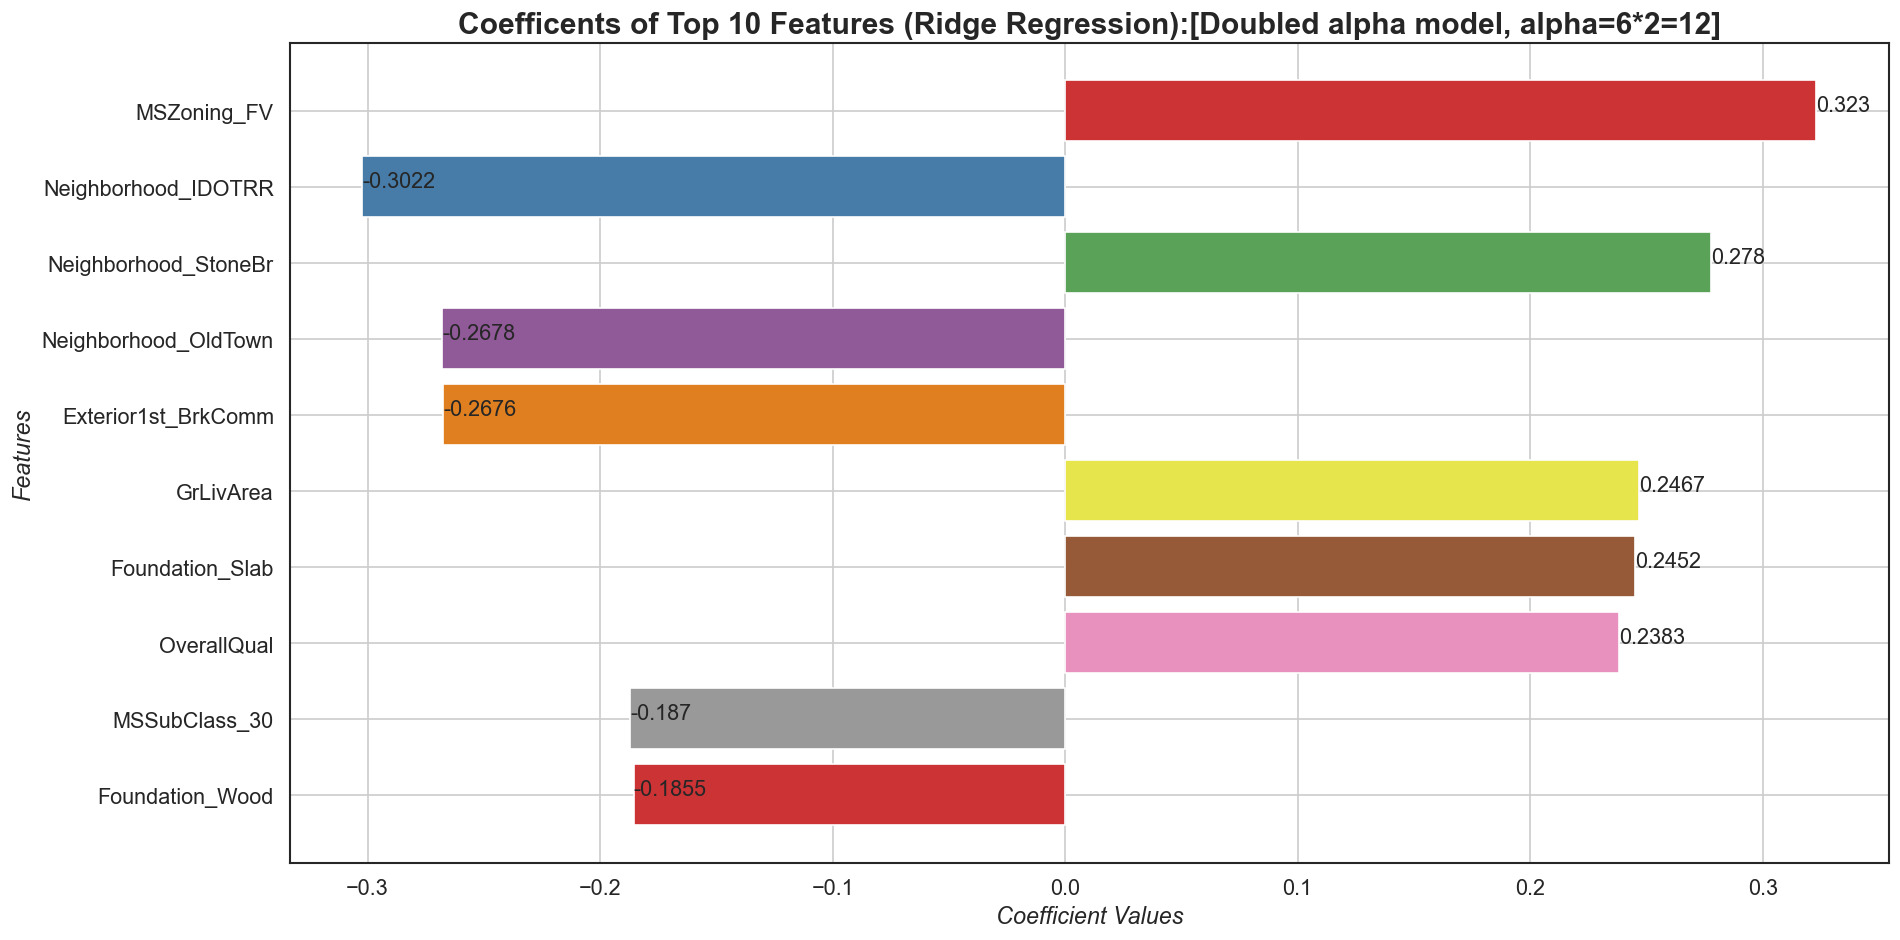

In [113]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):[Doubled alpha model, alpha=6*2=12]', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [114]:
print("For Ridge Regression (Doubled alpha model, alpha=2*2=4): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=2*2=4): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['MSZoning_FV', 'Neighborhood_IDOTRR', 'Neighborhood_StoneBr', 'Neighborhood_OldTown', 'Exterior1st_BrkComm', 'GrLivArea', 'Foundation_Slab', 'OverallQual', 'MSSubClass_30', 'Foundation_Wood'] 
 *****************************************************************************************************************************


for Lasso Regression

In [115]:
##Checking the outcome: coefficient values with double the value of alpha = 0.0003*2 = 0.006 (For Lasso Regression)

lasso = Lasso(alpha=0.0006)
        
lasso.fit(X_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)

Intercept:  -0.0872715411333112
Coefficients:
  [ 0.0415071   0.04535545  0.23765979  0.10889056  0.09948091  0.01138084
 -0.          0.15349986  0.24892278  0.04985508  0.04773416 -0.05565041
  0.04618132  0.04917676  0.0990909   0.0283967  -0.0857889   0.0552499
 -0.18903764  0.02622487  0.02312153  0.05769566 -0.19073081  0.07215251
  0.34588118  0.13128448 -0.09820337 -0.33589785 -0.07540305 -0.12589427
 -0.14859086  0.13402089 -0.28134791 -0.09008896 -0.15103979  0.31421059
  0.          0.19629913  0.22493218  0.07328792 -0.         -0.00069111
  0.29393946  0.07073729 -0.27465277  0.08632582  0.         -0.55345092
  0.         -0.15522467]


In [116]:
##RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.0003*2 = 0.0006)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model: (Doubled alpha model: alpha:0.0003*2 = 0.0006)
 ****************************************

For Train Set:
R2 score: 0.9166619132505517 
MSE score: 0.08333808674944836 
MAE score: 0.20939123416427446 
RMSE score: 0.2886833676356301

For Test Set:
R2 score: 0.8880856587419308 
MSE score: 0.10849349783074852 
MAE score: 0.2261099797897605 
RMSE score: 0.32938351177730274 
 ****************************************


In [117]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0   Exterior1st_BrkComm      -0.5535                            0.5535
1           MSZoning_FV       0.3459                            0.3459
2   Neighborhood_IDOTRR      -0.3359                            0.3359
3  Neighborhood_StoneBr       0.3142                            0.3142
4       Foundation_Slab       0.2939                            0.2939
5  Neighborhood_OldTown      -0.2813                            0.2813
6       Foundation_Wood      -0.2747                            0.2747
7             GrLivArea       0.2489                            0.2489
8           OverallQual       0.2377                            0.2377
9     Exterior2nd_Stone       0.2249                            0.2249

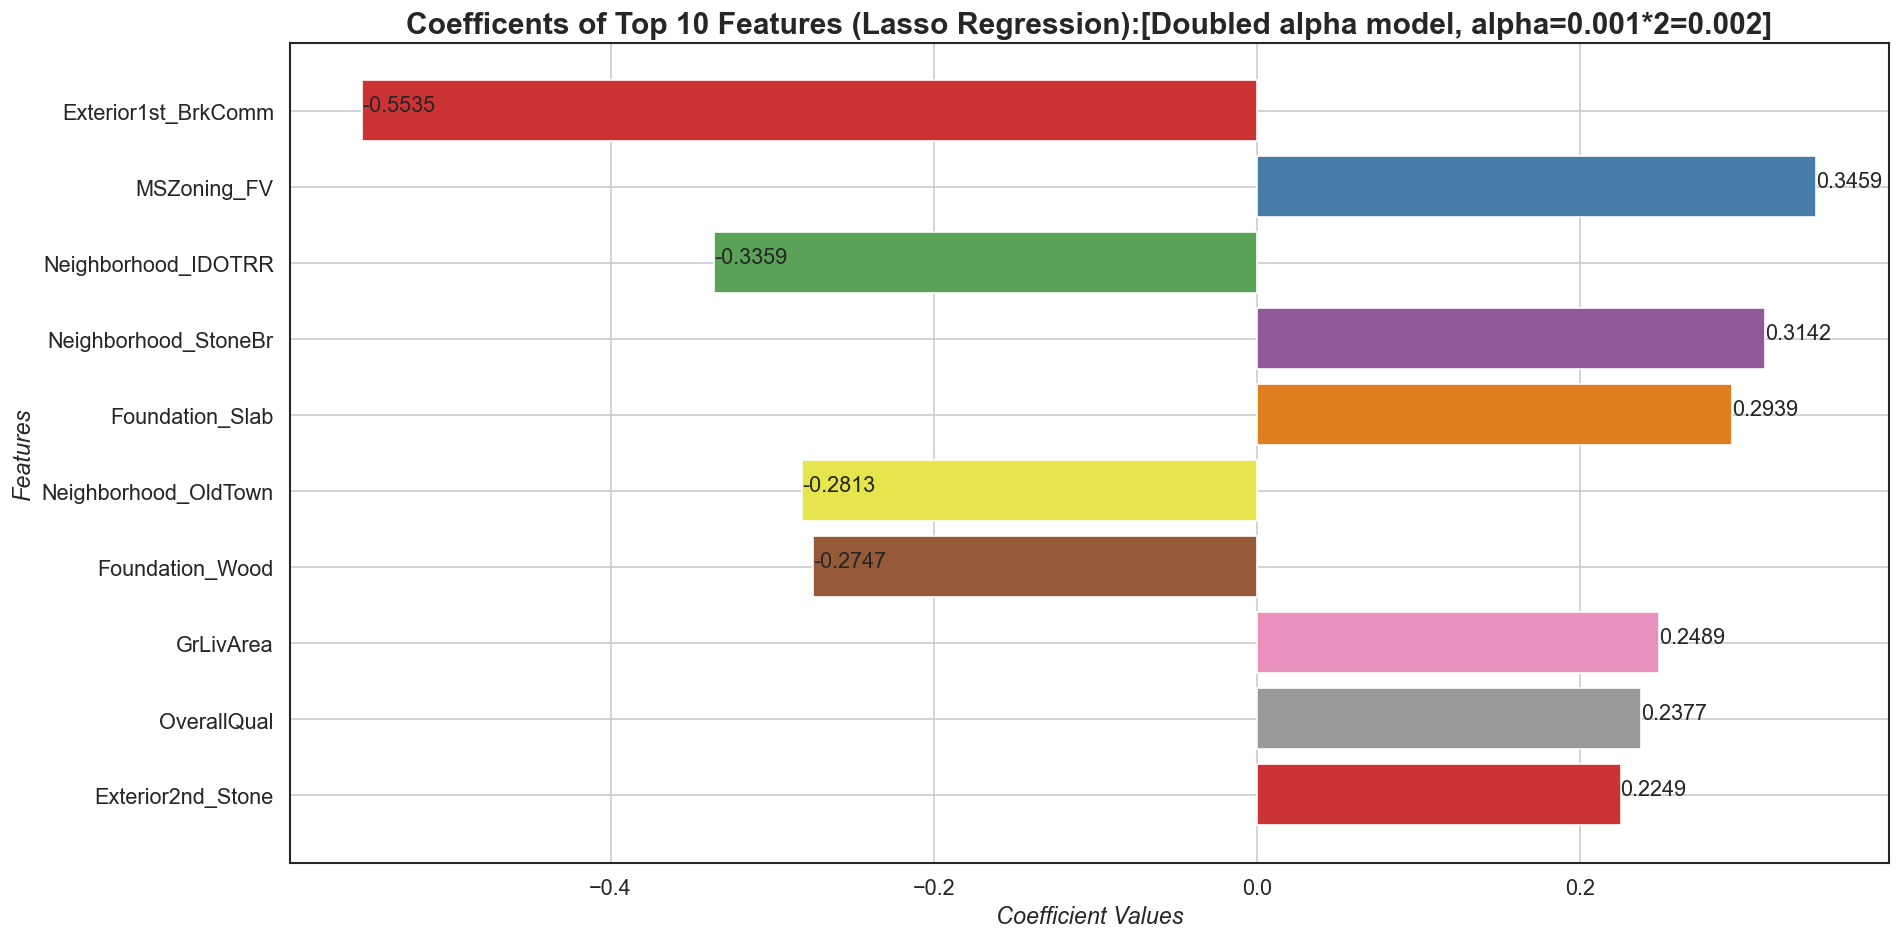

In [118]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):[Doubled alpha model, alpha=0.001*2=0.002]', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [119]:
print("For Lasso Regression (Doubled alpha model: alpha:0.0003*2 = 0.0006): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_lasso_df['Features']),"\n", "*"*125)

For Lasso Regression (Doubled alpha model: alpha:0.0003*2 = 0.0006): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['Exterior1st_BrkComm', 'MSZoning_FV', 'Neighborhood_IDOTRR', 'Neighborhood_StoneBr', 'Foundation_Slab', 'Neighborhood_OldTown', 'Foundation_Wood', 'GrLivArea', 'OverallQual', 'Exterior2nd_Stone'] 
 *****************************************************************************************************************************


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [121]:
##From Original Lasso Regression Model, import 'top5_original_lasso_features': Top5 features
print("Top 5 features in original lasso model (dropped):\n", top5_original_lasso_features)


##Removing these top5 features (as per Original Lasso Model) from 'df'
df= df.drop(top5_original_lasso_features, axis=1)
df.head()

Top 5 features in original lasso model (dropped):
 ['Exterior1st_BrkComm', 'Foundation_Wood', 'Neighborhood_IDOTRR', 'MSZoning_FV', 'Neighborhood_StoneBr']


LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           0        150          856             0       1710             1   
1           0        284         1262             0       1262             0   
2           0        434          920             0       1786             1   
3           0        540          756             0       1717             1   
4           0        490         1145             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
0             0         2         1             3             1           0   
1             1         2         0             3             1           1   
2             0         2         1             3             1           1   
3             0         1         0             3             1           1   
4             0         2         1             4             1           1   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         2003         548           0           61              0          0   
1         1976         460         298            0              0          0   
2         2001         608           0           42              0          0   
3         1998         642           0           35            272          0   
4         2000         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  SalePrice  HouseAge  d_LotShape  \
0            0         0        0  12.247694         5           3   
1            0         0        0  12.109011        31           3   
2            0         0        0  12.317167         6           2   
3            0         0        0  11.849398        36           2   
4            0         0        0  12.429216         8           2   

   d_BsmtQual  d_BsmtExposure  d_HeatingQC  d_GarageFinish  MSSubClass_30  \
0           4               1            5               2          False   
1           4               4            5               2          False   
2           4               2            5               2          False   
3           3               1            4               1          False   
4           4               3            5               2          False   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False           True          False   
3          False          False          False          False           True   
4          False          False          False           True          False   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0          False          False          False          False           False   
1          False          False          False          False           False   
2          False          False          False          False           False   
3          False          False          False          False           False   
4          False          False          False          False           False   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  LotConfig_CulDSac  \
0           False           False           False              False   
1           False           False           False              False   
2           False           F

In [122]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)

train-test splitt

In [123]:
##split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [124]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols =df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler fit_transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [125]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [126]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

## Feature Scaling continuous variables

In [128]:
#Cut down number of features to 50 using automated approach
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=50)

selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = selector.support_

# Print or use the selected features
print("Selected Features:", selected_features)

Selected Features: [ True  True  True  True False  True  True  True  True False  True False
 False  True  True False  True  True  True  True False False False False
 False False False  True False  True False  True False  True False False
 False False False  True  True  True  True False False  True False False
 False False False False False False False  True False False  True False
 False  True  True  True False  True False False  True False  True False
 False False False  True False False False False  True False False False
  True False False False  True  True  True  True False  True  True False
 False False  True False False  True  True  True False  True  True  True
  True  True]


In [130]:
###Columns selected by RFE and their weights
my_zip=list(zip(X_train.columns,selector.support_,selector.ranking_))
my_zip

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 49),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('LowQualFinSF', False, 54),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 44),
 ('BsmtHalfBath', False, 59),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 57),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 11),
 ('OpenPorchSF', False, 48),
 ('EnclosedPorch', False, 55),
 ('3SsnPorch', False, 53),
 ('ScreenPorch', False, 35),
 ('PoolArea', False, 61),
 ('MiscVal', False, 29),
 ('HouseAge', True, 1),
 ('d_LotShape', False, 51),
 ('d_BsmtQual', True, 1),
 ('d_BsmtExposure', False, 47),
 ('d_HeatingQC', True, 1),
 ('d_GarageFinish', False, 60),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 16),
 ('MSSubClass_45', False, 40),
 ('MSSubC

In [131]:
X_train.columns[selector.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea',
       'HouseAge', 'd_BsmtQual', 'd_HeatingQC', 'MSSubClass_30',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MSSubClass_180', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone',
       'Exterior2nd_Wd Shng', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Foundation_Slab', 'Foundation_Stone',
       'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior1st_WdShing', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_Bu

In [132]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)
top50_df

Features  rfe_support  rfe_ranking
0            LotFrontage         True            1
1                LotArea         True            1
2            OverallQual         True            1
3            OverallCond         True            1
4             BsmtFinSF1         True            1
5             BsmtFinSF2         True            1
6              BsmtUnfSF         True            1
7            TotalBsmtSF         True            1
8              GrLivArea         True            1
9               FullBath         True            1
10              HalfBath         True            1
11          KitchenAbvGr         True            1
12            Fireplaces         True            1
13           GarageYrBlt         True            1
14            GarageArea         True            1
15              HouseAge         True            1
16            d_BsmtQual         True            1
17           d_HeatingQC         True            1
18         MSSubClass_30         True            1
19         MSSubClass_75         True            1
20         MSSubClass_80         True            1
21         MSSubClass_85         True            1
22         MSSubClass_90         True            1
23        MSSubClass_180         True            1
24  Neighborhood_BrkSide         True            1
25  Neighborhood_Crawfor         True            1
26  Neighborhood_MeadowV         True            1
27  Neighborhood_Mitchel         True            1
28    Neighborhood_NAmes         True            1
29   Neighborhood_NWAmes         True            1
30  Neighborhood_OldTown         True            1
31   Neighborhood_Sawyer         True            1
32   Exterior2nd_Brk Cmn         True            1
33   Exterior2nd_ImStucc         True            1
34     Exterior2nd_Stone         True            1
35   Exterior2nd_Wd Shng         True            1
36     HouseStyle_1Story         True            1
37     HouseStyle_2.5Fin         True            1
38     HouseStyle_2.5Unf         True            1
39       Foundation_Slab         True            1
40      Foundation_Stone         True            1
41     RoofStyle_Gambrel         True            1
42   Exterior1st_AsphShn         True            1
43   Exterior1st_BrkFace         True            1
44   Exterior1st_ImStucc         True            1
45   Exterior1st_WdShing         True            1
46     GarageType_Attchd         True            1
47    GarageType_Basment         True            1
48    GarageType_BuiltIn         True            1
49    GarageType_CarPort         True            1

In [133]:
col = X_train.columns[selector.support_]

In [134]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe =X_train[col]

In [135]:
##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Lasso Regression

In [136]:
##Lasso Regression Model Building
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
3       0.0003         -0.217342        -0.228495                1
4       0.0004         -0.217488        -0.228502                2
2       0.0002         -0.217299        -0.228536                3
5       0.0005         -0.217740        -0.228630                4
1       0.0001         -0.217325        -0.228686                5
6       0.0006         -0.218052        -0.228854                6
7       0.0007         -0.218361        -0.229180                7
0      0.00001         -0.217413        -0.229189                8
8       0.0008         -0.218661        -0.229468                9
9       0.0009         -0.218983        -0.229736               10
10       0.001         -0.219328        -0.230028               11
11       0.005         -0.230516        -0.238021               12
12        0.01         -0.234420        -0.241230               13
13        0.05         -0.254794        -0.260070               14
14         0.1         -0.279583        -0.284357               15
15         0.2         -0.354180        -0.357503               16
16         0.3         -0.427922        -0.430457               17
17         0.4         -0.503736        -0.506022               18
18         0.5         -0.576048        -0.577835               19
19         0.6         -0.636055        -0.637773               20
20         0.7         -0.697506        -0.699012               21
21         0.8         -0.761580        -0.762717               22
35         100         -0.775470        -0.775675               23
34          50         -0.775470        -0.775675               23
33          20         -0.775470        -0.775675               23
32        10.0         -0.775470        -0.775675               23
31         9.0         -0.775470        -0.775675               23
30         8.0         -0.775470        -0.775675               23
29         7.0         -0.775470        -0.775675               23
28         6.0         -0.775470        -0.775675               23
27         5.0         -0.775470        -0.775675               23
26         4.0         -0.775470        -0.775675               23
25         3.0         -0.775470        -0.775675               23
24         2.0         -0.775470        -0.775675               23
23         1.0         -0.775470        -0.775675               23
22         0.9         -0.775470        -0.775675               23
36         500         -0.775470        -0.775675               23
37        1000         -0.775470        -0.775675               23

In [138]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.00009, 0.00005, 0.00003, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 5e-05, 3e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [139]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
6       0.0003         -0.217342        -0.228495                1
7       0.0004         -0.217488        -0.228502                2
5       0.0002         -0.217299        -0.228536                3
8       0.0005         -0.217740        -0.228630                4
4       0.0001         -0.217325        -0.228686                5
1      0.00009         -0.217331        -0.228722                6
9       0.0006         -0.218052        -0.228854                7
2      0.00005         -0.217361        -0.228916                8
3      0.00003         -0.217383        -0.229041                9
10      0.0007         -0.218361        -0.229180               10
0      0.00001         -0.217413        -0.229189               11
11      0.0008         -0.218661        -0.229468               12
12      0.0009         -0.218983        -0.229736               13
13       0.001         -0.219328        -0.230028               14
14       0.005         -0.230516        -0.238021               15
15        0.01         -0.234420        -0.241230               16
16        0.02         -0.238969        -0.246185               17
17        0.05         -0.254794        -0.260070               18

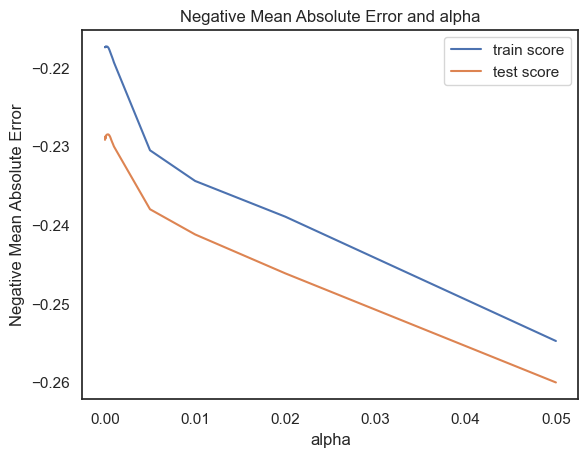

In [141]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [142]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003)

In [143]:
# check the coefficient values with (lambda) alpha = 0.0004

lasso = Lasso(alpha=0.0003)
        
lasso.fit(X_train, y_train) 
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  -0.0667082223509979
Coefficients:
 [ 0.03649994  0.0537752   0.25668109  0.08847558  0.11202772  0.01449437
 -0.          0.12890872  0.24030617  0.06860121  0.06296972 -0.05211413
  0.04807991  0.03008379  0.12916829 -0.08995111  0.08622169  0.05458358
 -0.24872972 -0.          0.08301523  0.15141898  0.09158846  0.13004532
  0.07681378  0.21069006 -0.28506208 -0.12137779 -0.06715116 -0.13669043
 -0.2145206  -0.08756494 -0.33389838 -0.01946677  0.14730002 -0.11205589
  0.08987127 -0.04382711 -0.1233909   0.36983871  0.06554498  0.12970004
  0.          0.15095326  0.          0.04730242  0.0859365  -0.15993421
  0.1694575  -0.26128468]


In [144]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(5)  #New Top5 features display (Lasso Model: Reiterated)

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0       Foundation_Slab       0.3698                            0.3698
1   Exterior2nd_Brk Cmn      -0.3339                            0.3339
2  Neighborhood_MeadowV      -0.2851                            0.2851
3    GarageType_CarPort      -0.2613                            0.2613
4           OverallQual       0.2567                            0.2567

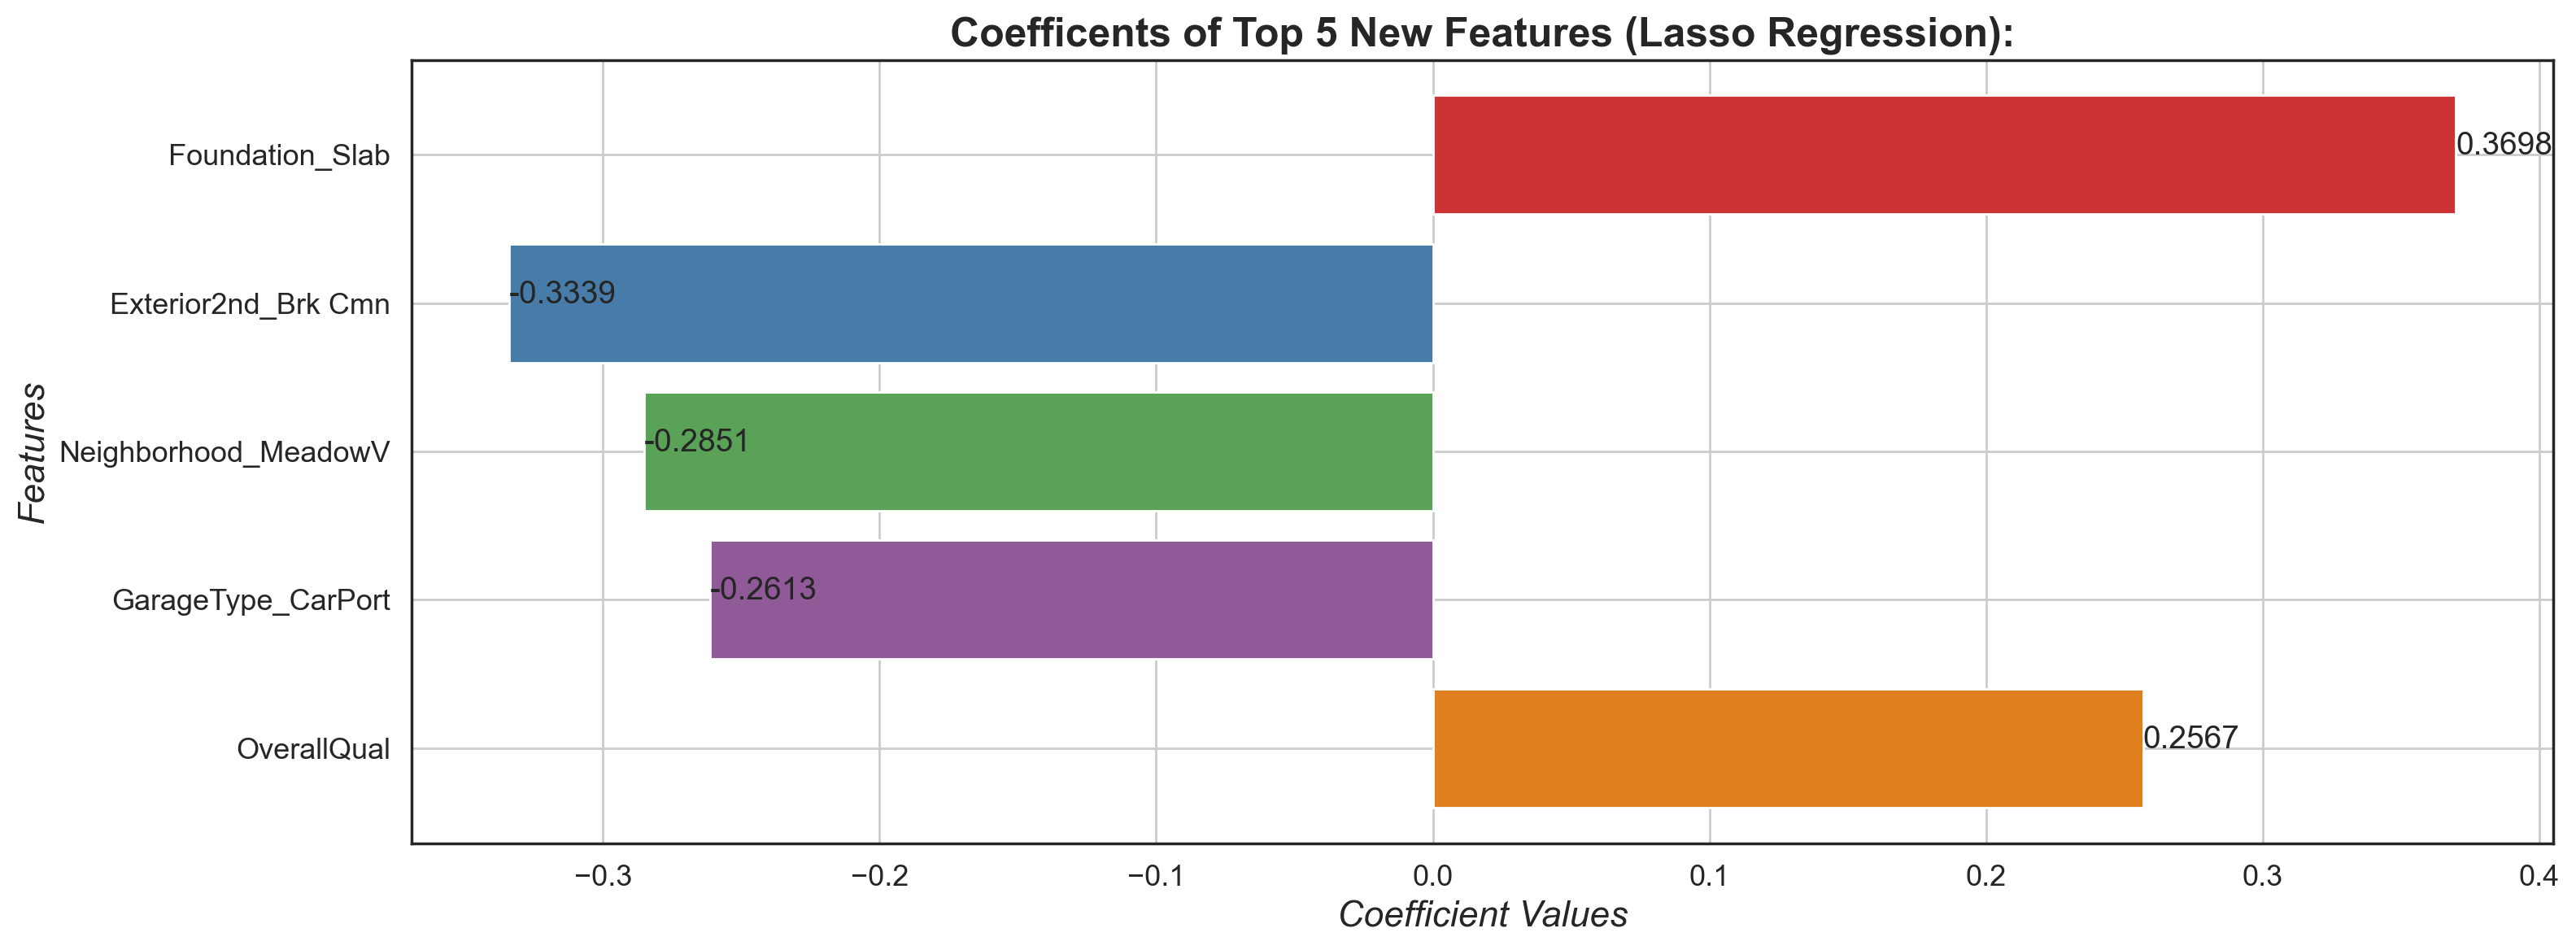

In [145]:
##Coefficient value plot (Lasso Regression)

top5_lasso_df= lasso_df.loc[:4] #'top5_lasso_df' datafram with top 5 features from the new model

sns.set(style='white')
plt.figure(figsize=(16,6), dpi=200)
ax4= sns.barplot(y=top5_lasso_df['Features'], x=top5_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 16, fontstyle='italic')
plt.ylabel('Features' , fontsize= 16, fontstyle='italic')
plt.title('Coefficents of Top 5 New Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top5_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=14)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [146]:
print("For New Lasso Regression Model (After eliminating the top5 features from the original model):\n","*"*125)
print("The top5 new most important predictor variables are as follows:\n\n",\
      list(top5_lasso_df['Features']),"\n", "*"*125)

For New Lasso Regression Model (After eliminating the top5 features from the original model):
 *****************************************************************************************************************************
The top5 new most important predictor variables are as follows:

 ['Foundation_Slab', 'Exterior2nd_Brk Cmn', 'Neighborhood_MeadowV', 'GarageType_CarPort', 'OverallQual'] 
 *****************************************************************************************************************************


Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

 


for both questions solutions are in subjective pdf file